In [214]:
from IPython.display import HTML
from IPython.display import Image
import warnings
warnings.filterwarnings("ignore")

<img src='grocery_store_image1.jpg' width="700" height="300" align="center">

# Customer Purchasing Behavior

In [215]:
HTML('''<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>''')



**By: Pieter Leffers**

Starting Date: June 7, 2019

Completion Date: August 25, 2019

Last Updated: September 2, 2019



Project Description
---

During the course of our lives most of us one point or another have had to buy at least one product from Walmart. However, for the lucky few who haven't heard of Walmart; Walmart is the poster child for multi-national big-box retail store that stock and sell over 75 million different products, items ranging from paint to plushies, from guns to guacamole. With over 11,300 stores globally, employing 2.2 million people, and with 275 million weekly customers, Walmart is easily one of the largest franchises in the world. Walmart's fiscal revenue is something to the tune of $514 billion per year making it the most lucrative company in the world. With nearly every Walmart store selling grocery items and produce, what many may not have considered is that Walmart is also one of the world's largest U.S. grocery retailers.

https://en.wikipedia.org/wiki/Walmart

https://expandedramblings.com/index.php/walmart-statistics/


**Problem**: Customer purchasing optimization is a common problem for a lot of companies, both large and small. Luckily most large companies should have a wealth of data available to them in order to predict the possible purchasing behavior for many of
their clients so they can make informed decisions about stocking their shelves, providing customer recommendations on items, customer promotions, and predicting when a customer is losing interest in their service and planning to buy from a competitor. My proposal is to analyse and demonstrate some of these metrics on public data found on the internet as well as provide an algorithm that can help to predict future long-term purchasing in the form of Customer Lifetime Values.

**Client** : Walmart is looking to hire a Data Scientist to mine their data and analyze it to design tools for their grocery store customer purchasing data in order to provide promotions and offers to their individual customers and customers whom fall within the same demographic; thereby encouraging loyalty and consistent purchasing behavior from their regular customers.  



**Data** : Inspired by the paper, <U>Customer Shopping Pattern Prediction: A Recurrent Neural Network Approach</U> by Hojjat Salehinejad and Shahryar Rahnamayan, the authors used a Recurrent Neural Network to predict customer loyalty values (R,F,M) using the **Ta Feng Grocery Dataset**. After doing some internet searching I managed to find a copy or sample of the Ta Feng Grocery dataset hosted on Kaggle but not part of a competition.



**Approach** : I intend to do basic exploratory analysis, followed by clustering customers into demographic groups using K-means clustering, and analyzing some of those groups, provide a few metrics such as propensity, affinity, customer lifetime value (CLV), and possibly customer churn or attrition. Finally I plan on finishing the project
with trying to apply a Recurrent Neural Network to predict sales using Keras.


### The Ta Feng Grocery Dataset

The Ta Feng Dataset is a Supermarket Dataset containing 817741 transactions from November 2000 until the end of February 2001. The dataset contains information about 119578 shopping baskets, belonging to 32266 users, where 1129939 items were purchased from a range of 23812 products.

Column definition: Transaction date and time (no timestamp), Customer ID, Age Group, PIN Code, Product subclass, Product ID, Amount, Asset, Sales price


Fields of the Dataset are:
- Transaction date and time (time invalid and useless)
- Customer ID
- Age: 10 possible values
- Residence Area: 8 possible values
- Product subclass
- Product ID
- Amount
- Asset
- Sales price

https://www.kaggle.com/chiranjivdas09/ta-feng-grocery-dataset
https://stackoverflow.com/questions/25014904/download-link-for-ta-feng-grocery-dataset


Summary
-----

**Exploratory Data Analysis**
After exploring and investigating each column of the dataset independantly I find explore and find out some valuable insights about 1 or two of those columns. Namely discovering the unexpected behavior regarding the 'Amount' and 'Sales Price' columns and their effect on one another. I found that these two important columns have non-normally distributed data and seem to have an unclear relationship. After investigating that relationship I surmise that the 'Sales Price' column is probably the total transaction price as opposed to the price per unit. Using this assumption would explain the relationship between 'Amount' and 'Sales Price'. After further exploring the data by performing some statistical tests on the data I provide some valuable business metrics based on cohort analysis.

**Cohort Analysis**
I first seperate the cohorts into weekly intervals by the first week that the customers purchased an item. After which I provide tables based on cohort counts, such as customer retention rate, average number of items purchase per cohort, the average transaction cost per cohort, and the average unit price (*see below*) per cohort. After doing some basic cohort analysis I then start to classify customer ids based on their Recency, Freqency, and Monetary values. In doing so, I make it easier to identify and classify customers whom are most important to target with special promotions and offers. 

**Customer Segmentation**
The first form of customer segmentation I employ is based on percentiles (*quartiles*) of RFM purchasing behavior.
I further make these RFM findings easier to understand by providing an 'RFM Score' which shows the relative customer value of each customer id. This is further simplified by classifying customer ids into groups such as gold, silver, and bronze level shoppers. Finally, I finish off my customer segmentation by using K-means to automatically classify similar behavior customers which is a convenient method for simplicity and unique ability to work with especially large datasets.


Difficulties:
    1. Extreme non-linearity
    2. Seasonality
    3. Lack of familiarity with the data
    4. Weekly time intervals
        - Normal time operations typically involve year,month,or day seperation

Import Packages

In [189]:
import pandas as pd
import numpy as np
import pickle
from datetime import date
import datetime as dt
import struct
import pylab
import pickle
import warnings
import random
import sklearn
from scipy import stats 
from scipy.stats import truncnorm
import statsmodels.api as sm
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from IPython.display import display, Math, Latex
import statsmodels.stats.api as sm
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import statsmodels.stats.api as sms
# Import StandardScaler 
from sklearn.preprocessing import StandardScaler
# Import KMeans 
from sklearn.cluster import KMeans
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
from plotly import graph_objs as go
warnings.filterwarnings("ignore")

### Import and Prepare Data


In [190]:
#List of column names
col_names=['transaction_dt', 'customer_id', 'age_group', 'pin_code', 'product_subclass', 'product_id','amount','asset','sales_price']

November dataset

In [191]:
#Import data using ISO-8859-1 seems to work, seperation is semi-colon
November_2000=pd.read_csv('D11',sep=';',names=col_names, encoding = 'ISO-8859-1',low_memory=False) 
# the first row in the raw data that is garbage
November_2000=November_2000.drop(November_2000.index[0])
#modify dates column to datetime
November_2000['transaction_dt'] = pd.to_datetime(November_2000['transaction_dt'])
#remove empty spaces from values from the columns
November_2000['age_group'] = November_2000['age_group'].str.strip()
November_2000['pin_code'] = November_2000['pin_code'].str.strip()
November_2000['customer_id'] = November_2000['customer_id'].str.strip()
November_2000.head(3)

transaction_dt customer_id age_group pin_code product_subclass  \
1     2000-11-01    00046855         D        E           110411   
2     2000-11-01    00539166         E        E           130315   
3     2000-11-01    00663373         F        E           110217   

      product_id amount asset sales_price  
1  4710085120468      3    51          57  
2  4714981010038      2    56          48  
3  4710265847666      1   180         135

December dataset

In [192]:
December_2000=pd.read_csv('D12',sep=';',names=col_names, encoding = 'ISO-8859-1',low_memory=False)
December_2000=December_2000.drop(December_2000.index[0])
December_2000['transaction_dt'] = pd.to_datetime(December_2000['transaction_dt'])
December_2000['age_group'] = December_2000['age_group'].str.strip()
December_2000['pin_code'] = December_2000['pin_code'].str.strip()
December_2000['customer_id'] = December_2000['customer_id'].str.strip()
December_2000.head(3)

transaction_dt customer_id age_group pin_code product_subclass  \
1     2000-12-01    00207423         C        E           530101   
2     2000-12-01    00329002         F        E           590514   
3     2000-12-01    01657951         E        E           120103   

      product_id amount asset sales_price  
1  4710054134403      1    92          99  
2  4710049000973      1    41          49  
3  4710011401135      1    23          29

January dataset

In [193]:
January_2001=pd.read_csv('D01',sep=';',names=col_names, encoding = 'ISO-8859-1',low_memory=False)
January_2001=January_2001.drop(January_2001.index[0])
January_2001['transaction_dt'] = pd.to_datetime(January_2001['transaction_dt'])
January_2001['age_group'] = January_2001['age_group'].str.strip()
January_2001['pin_code'] = January_2001['pin_code'].str.strip()
January_2001['customer_id'] = January_2001['customer_id'].str.strip()
January_2001.head(3)

transaction_dt customer_id age_group pin_code product_subclass  \
1     2001-01-01    00141833         F        F           130207   
2     2001-01-01    01376753         E        E           110217   
3     2001-01-01    01603071         E        G           100201   

      product_id amount asset sales_price  
1  4710105011011      2    44          52  
2  4710265849066      1   150         129  
3  4712019100607      1    35          39

February dataset

In [194]:
February_2001=pd.read_csv('D02',sep=';',names=col_names, encoding = 'ISO-8859-1',low_memory=False)
February_2001=February_2001.drop(February_2001.index[0])
February_2001['transaction_dt'] = pd.to_datetime(February_2001['transaction_dt'])
February_2001['age_group'] = February_2001['age_group'].str.strip()
February_2001['pin_code'] = February_2001['pin_code'].str.strip()
February_2001['customer_id'] = February_2001['customer_id'].str.strip()
February_2001.head(3)

transaction_dt customer_id age_group pin_code product_subclass  \
1     2001-02-01    00557818         H        E           500210   
2     2001-02-01    01677683         C        B           711310   
3     2001-02-01    01900910         A        D           500206   

      product_id amount asset sales_price  
1  4710114105046      1   123         135  
2  4902520163103      6   840         894  
3  4710036003598      1    26          33

_______________________

### Combine the Datasets

In [195]:
#Create value labels for dataframe
#Age Grouping labels
age_dict_class = {'A':'<25', 'B':'25-29', 'C':'30-34', 'D':'35-39', 'E':'40-44', \
        'F':'45-49', 'G':'50-54', 'H':'55-59', 'I':'60-64', 'J':'+65', 'K':'NA'}

inv_age_dict_class = {v: k for k, v in age_dict_class.items()} #thank you stack overflow!

#Age Grouping labels into integer values
age_dict_int = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, \
        'F':6, 'G':7, 'H':8, 'I':9, 'J':10, 'K':11}

inv_age_dict_int = {v: k for k, v in age_dict_int.items()} 

#pin code values into integers
pin_code_dict_int = {'A':1, 'B':2, 'C':3, 'D':4, 'E':5, \
        'F':6, 'G':7, 'H':8}

In [196]:
#Combine Datasets
total_set=November_2000.append(December_2000).append(January_2001).append(February_2001)
#Apply value labels for dataframe
total_set['age_label'] = total_set['age_group'].apply(lambda x: age_dict_class[x])
total_set['age_int'] = total_set['age_group'].apply(lambda x: age_dict_int[x])
total_set['pin_code_int'] = total_set['pin_code'].apply(lambda x: pin_code_dict_int[x])

In [197]:
total_set.head()

transaction_dt customer_id age_group pin_code product_subclass  \
1     2000-11-01    00046855         D        E           110411   
2     2000-11-01    00539166         E        E           130315   
3     2000-11-01    00663373         F        E           110217   
4     2000-11-01    00340625         A        E           110411   
5     2000-11-01    00236645         D        H           712901   

      product_id amount asset sales_price age_label  age_int  pin_code_int  
1  4710085120468      3    51          57     35-39        4             5  
2  4714981010038      2    56          48     40-44        5             5  
3  4710265847666      1   180         135     45-49        6             5  
4  4710085120697      1    17          24       <25        1             5  
5  8999002568972      2   128         170     35-39        4             8

Sort by Customer ID and Date

In [198]:
total_set=total_set.sort_values(by=['customer_id','transaction_dt'])
total_set=total_set.reset_index(drop=True)

In [199]:
total_set.head(5)

transaction_dt customer_id age_group pin_code product_subclass  \
0     2000-11-13    00001069         K        E           100314   
1     2000-11-13    00001069         K        E           100205   
2     2001-01-21    00001069         K        E           110333   
3     2001-01-21    00001069         K        E           100311   
4     2001-01-21    00001069         K        E           110333   

      product_id amount asset sales_price age_label  age_int  pin_code_int  
0  4710176008699      1    78          98        NA       11             5  
1  9556439880610      1    80          89        NA       11             5  
2  4710320224661      1   361         425        NA       11             5  
3  4710022101208      1   197         198        NA       11             5  
4  4712603661644      1   313         348        NA       11             5

In [200]:
#total_set.customer_id.value_counts()

In [201]:
#Handy Function I use sometimes to one-hot encode. 
#Basically .dummies() works better in most cases
def create_dummies(df,column):
    '''
    Function to create one-hot encoding. 
          Not the most efficient but it works.
    '''
    temp=pd.DataFrame(df[column])
    for x in temp[column].unique():
        temp[str(column+'_')+x]=(temp[column]==x).astype(int)
    return temp

#Create dummy variables for age groupings
temp_age_group=create_dummies(total_set,'age_group')
comparison=sorted(temp_age_group.columns)
temp_age_group=temp_age_group[comparison]
#concatenate the previously created dataframe with the created dummies
temp_age_group=pd.concat([total_set, temp_age_group], axis=1)

In [202]:
#Same as above but creating dummies of pin code
temp_pin_code=create_dummies(temp_age_group,'pin_code')
comparison=sorted(temp_pin_code.columns)
temp_pin_code=temp_pin_code[comparison]

temp_pin_code=pd.concat([temp_age_group, temp_pin_code], axis=1)

In [203]:
total_set=temp_pin_code.drop(['age_group','pin_code'],axis=1)

In [204]:
total_set.head(3).style.hide_index().set_caption('Total Raw Data w/ Dummies')

**Convert Columns to Integers **

*Note: keep in mind some are ordinal categories*

In [205]:
#convert variables to integers
#total_set['customer_id']=total_set.customer_id.astype(np.int64)
total_set['product_subclass']=total_set.product_subclass.astype(np.int64)
total_set['product_id']=total_set.product_id.astype(np.int64)
total_set['amount']=total_set.amount.astype(np.int64)
total_set['asset']=total_set.asset.astype(np.int64)
total_set['sales_price']=total_set.sales_price.astype(np.int64)

In [206]:
age_map=total_set.reset_index()
age_map=total_set[['customer_id','age_int']]
age_map=dict(zip(list(age_map.customer_id),list(age_map.age_int)))

In [207]:
pin_map=total_set.reset_index()
pin_map=total_set[['customer_id','pin_code_int']]
pin_map=dict(zip(list(pin_map.customer_id),list(pin_map.pin_code_int)))

In [208]:
total_set.head(3).style.hide_index().set_caption('Integer Modified Data')

*Now all the variables we might use are integer type making it easier to work with for modeling or plotting* 

In [209]:
total_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817741 entries, 0 to 817740
Data columns (total 29 columns):
transaction_dt      817741 non-null datetime64[ns]
customer_id         817741 non-null object
product_subclass    817741 non-null int64
product_id          817741 non-null int64
amount              817741 non-null int64
asset               817741 non-null int64
sales_price         817741 non-null int64
age_label           817741 non-null object
age_int             817741 non-null int64
pin_code_int        817741 non-null int64
age_group_A         817741 non-null int32
age_group_B         817741 non-null int32
age_group_C         817741 non-null int32
age_group_D         817741 non-null int32
age_group_E         817741 non-null int32
age_group_F         817741 non-null int32
age_group_G         817741 non-null int32
age_group_H         817741 non-null int32
age_group_I         817741 non-null int32
age_group_J         817741 non-null int32
age_group_K         817741 non-null in

Minimize to just needed columns

In [210]:
minimized_set=total_set[['transaction_dt','customer_id','age_int','product_subclass','product_id','pin_code_int','asset','amount','sales_price']]
minimized_set=minimized_set.sort_values(by='transaction_dt',ascending=True)

In [211]:
minimized_set.head().style.hide_index().set_caption('Reduced Data')

***For the most part the data has been fairly clean, I've had to remove white spaces, convert to datetime format, and modify the columns to be integers for data analysis and modeling. I have also created label dictionaries so I can easily map the labels to the values back and forth. Since I don't know the format or what the correct values are supposed to be it is probably wise to leave the values as they are unless there are wildly inconsistent with the rest of the data (outliers).***

______________________________________________

Exploratory Data Analysis
------

**Transaction Dates**

We know from the description what the time periods are; however in this particular case I'm interested in seeing the count of transactions by weeks, partially to confirm the dates are correct and to possibly identify time periods that have the most activity between the two years. Note: we expect that the years are different from each other and that seasonality would have a strong effect on purchasing behavior patters.

In [212]:
#helper function for calculating the number of months from the first transaction
def get_date_int(df,column):
    '''
    Returns year,month,week, and day units.
    '''
    year=df[column].dt.year
    month=df[column].dt.month
    week=df[column].dt.week
    day=df[column].dt.day
    return year,month,week,day

In [213]:
minimized_set['year'],minimized_set['month'],minimized_set['week'],minimized_set['day']=get_date_int(minimized_set,'transaction_dt')

In [214]:
wk_set=minimized_set[['year','week','amount']]
wk_set=wk_set.groupby(['year','week']).count()
wk_set=wk_set.reset_index()
wk_set_2000=wk_set[wk_set['year']==2000][['week','amount']]
wk_set_2001=wk_set[wk_set['year']==2001][['week','amount']]

Text(0.5,1,'Weekly Transactions in the Year 2000')

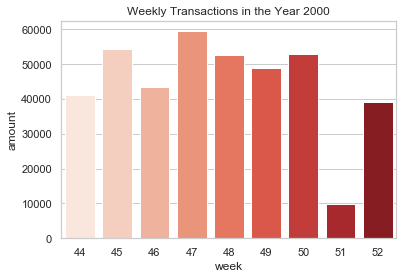

In [215]:
sns.barplot(x="week", y="amount", data=wk_set_2000, palette='Reds').set_title('Weekly Transactions in the Year 2000')

Text(0.5,1,'Weekly Transactions in the Year 2001')

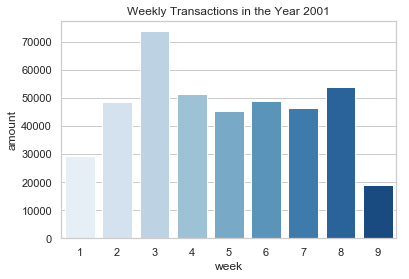

In [216]:
sns.barplot(x="week", y="amount", data=wk_set_2001, palette='Blues').set_title('Weekly Transactions in the Year 2001')

In [217]:
wk_set_2000['amount'].describe()

count        9.000000
mean     44648.666667
std      14621.057699
min       9940.000000
25%      41193.000000
50%      48801.000000
75%      53017.000000
max      59453.000000
Name: amount, dtype: float64

In [218]:
wk_set_2001['amount'].describe()

count        9.000000
mean     46211.444444
std      15374.311425
min      18863.000000
25%      45180.000000
50%      48477.000000
75%      51337.000000
max      73784.000000
Name: amount, dtype: float64

### *Is there a significant difference in number of products purchased by years?*

In [219]:
print('If we fail to reject the null hypothesis then the data would seem consistent with the claim that there is no difference between the sample means. ')
Math(r'H_{0} : \mu_{2000} - \mu_{2001} = 0 \\ H_{1} : \mu_{2000} - \mu_{2001} \neq 0')

If we fail to reject the null hypothesis then the data would seem consistent with the claim that there is no difference between the sample means. 


<IPython.core.display.Math object>

In [220]:
Math(r'z: = \dfrac{(p_1 - p_2)}{\sqrt{\dfrac{p_1*(1-p_1)}{n_1} + \dfrac{p_2*(1-p_2)}{n_2} }}')

<IPython.core.display.Math object>

In [221]:
stat,pval = stats.ttest_ind(wk_set_2000['amount'], wk_set_2001['amount'])
ci = sm.CompareMeans(sm.DescrStatsW(wk_set_2000['amount']), sm.DescrStatsW(wk_set_2001['amount'])).tconfint_diff(usevar='unequal')
print('Estimate:',stat,'\np-value:',pval)
print('95% C.I. ',ci)

Estimate: -0.2209746082341387 
p-value: 0.827907466263077
95% C.I.  (-16558.253432837068, 13432.697877281507)


**Explanation:**

We see that there is a great deal of activity in the weeks leading up to the holiday season and then tapering off after several weeks after the holiday season. I would expect the last few weeks of the dataset to reflect more normal purchasing activity compared the rest of the dataset. That being said after doing a test comparing the sample means of purchasing activity for both years, using a threshold of p=0.05, we fail to reject the null hypothesis that there is no difference in the sample means. Therefore we can conclude that the average transaction counts are similar from November/December 2000 and January/February 2001. *(i.e. There approx. equal number of transactions on average from 2000 and 2001)*

**Customer IDs**

We can see there are over 32200 seperate Customer Id's in the dataset with some having over 1,000 transactions to the grocery store within a 4 month period of time. That is a pretty big number for such a short period of time!

In [222]:
minimized_set.customer_id.value_counts().describe()

count    32266.000000
mean        25.343736
std         34.717992
min          1.000000
25%          6.000000
50%         14.000000
75%         32.000000
max       1246.000000
Name: customer_id, dtype: float64

***Customer 00020459***

*Magnifying the customer with the most transactions the data appear to be valid transactions, in that, I don't see anything about the data that would strike me as duplicates or anything like that. They are clearly seperate items, some with quite a few amounts on seperate occasions. *

In [223]:
cust_00020459=minimized_set[minimized_set['customer_id']=='00020459']
cust_00020459.head()

transaction_dt customer_id  age_int  product_subclass     product_id  \
1522     2000-11-02    00020459        5            320203  4715398106864   
1523     2000-11-02    00020459        5            110401  4710088410610   
1524     2000-11-02    00020459        5            100312  4710543214012   
1525     2000-11-02    00020459        5            110136  4710088410207   
1526     2000-11-02    00020459        5            130204  4710105015125   

      pin_code_int  asset  amount  sales_price  year  month  week  day  
1522             4     70       2           78  2000     11    44    2  
1523             4     19       1           26  2000     11    44    2  
1524             4     14       1           18  2000     11    44    2  
1525             4     44       1           55  2000     11    44    2  
1526             4     94       1          106  2000     11    44    2

In [224]:
cust_00020459['amount'].value_counts()

1     1017
2      167
3       34
4       13
6        8
5        4
12       1
8        1
7        1
Name: amount, dtype: int64

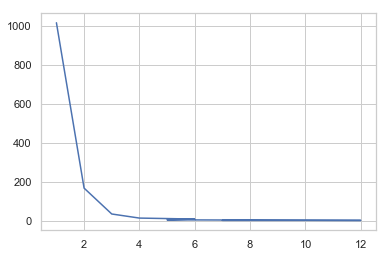

In [225]:
cust_00020459=minimized_set[minimized_set['customer_id']=='00020459'] 
plt.plot(cust_00020459['amount'].value_counts())

**Explanation:** Without having a more intimate knowledge of the data the Customer Id's look fine. There are definitely some outliers in terms of transactions. I suspect there is some kind of clerical error happening here since aside from the actual ID everything else about the transactions look normal.

**Age Groups**

In [226]:
minimized_set.age_int.describe()

count    817741.000000
mean          4.817952
std           2.252038
min           1.000000
25%           3.000000
50%           4.000000
75%           6.000000
max          11.000000
Name: age_int, dtype: float64

In [227]:
def row_percent(df,col):
    col_sum=df[col].sum()
    return df[col]/col_sum

In [228]:
age_grps=pd.DataFrame(minimized_set.age_int.value_counts()).reset_index()
age_grps.columns=['Age_Class','Counts']

age_grps['Age_Class']=age_grps['Age_Class'].map(inv_age_dict_int)
age_grps['Age_Class']=age_grps['Age_Class'].map(age_dict_class)
age_grps['Percent']=row_percent(age_grps,'Counts')
age_grps

Age_Class  Counts   Percent
0      35-39  181213  0.221602
1      40-44  151023  0.184683
2      30-34  140805  0.172188
3      45-49   99719  0.121944
4      25-29   66432  0.081238
5      50-54   53719  0.065692
6        <25   30070  0.036772
7        +65   27353  0.033449
8      55-59   24743  0.030258
9         NA   22362  0.027346
10     60-64   20302  0.024827

Text(0.5,1,'Age Ranges for Customers')

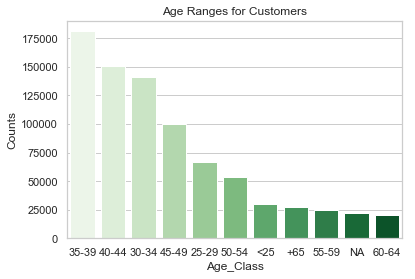

In [229]:
sns.barplot(x="Age_Class", y="Counts", data=age_grps, palette='Greens').set_title('Age Ranges for Customers')

**Explanation:** We can see the bulk of frequent shoppers come from the age ranges of 35 to 44, this would seem consistent for a grocery store if you are a young adult shopper and need to buy sustenance for your broodlings. Presumably older adults only need to buy for themselves and their partners.

**Product Subclass**

There's not much information that can be provided about product_subclass without knowing how the products are coded. I can't really plot them since there are over 2000 seperate classes. There don't appear to be any missing values. 

In [230]:
print('Unique product subclasses:',len(minimized_set.product_subclass.unique()))

Unique product subclasses: 2012


In [231]:
minimized_set.product_subclass.describe()

count    817741.000000
mean     284950.495933
std      226390.701451
min      100101.000000
25%      110106.000000
50%      130106.000000
75%      520314.000000
max      780510.000000
Name: product_subclass, dtype: float64

**Product ID**

Again there isn't much that can be said about the product ids without a coding scheme to reference. There are over 23,000 different items and again there don't appear to be any missing values.

In [232]:
print('Unique product IDs:',len(minimized_set.product_id.unique()))

Unique product IDs: 23812


In [233]:
minimized_set.product_id.describe()

count    8.177410e+05
mean     4.461639e+12
std      1.690093e+12
min      2.000882e+07
25%      4.710085e+12
50%      4.710421e+12
75%      4.712500e+12
max      9.789580e+12
Name: product_id, dtype: float64

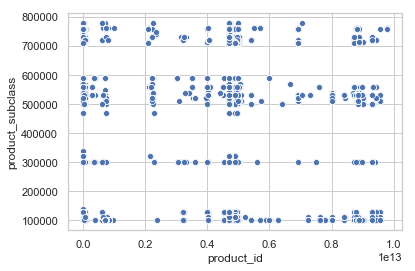

In [234]:
products=minimized_set[['product_subclass','product_id']]
sns.scatterplot(x="product_id", y="product_subclass", data=products)

**Explanation:** We can see there are definitely distinct groupings of products for each subclass. We can also see that the bulk of products seem to be clustered around the mean and extremes of subclasses. If I knew more information about the subclass groupings it would probably make sense to further bin these groups to into a smaller group of categories, say 20 seperate categories.

**Pin Code**

We can see the lion's share of transactions happen within regions 5 and 6.

Text(0.5,1,'Regions for Customers')

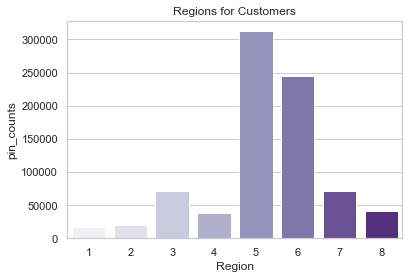

In [235]:
pin_grps=pd.DataFrame(minimized_set.pin_code_int.value_counts()).reset_index()
pin_grps.columns=['Region','pin_counts']
sns.barplot(x="Region", y="pin_counts", data=pin_grps, palette='Purples').set_title('Regions for Customers')

**Asset**

Presumably Asset means asset number to help identify the products. I am not certain how asset numbers work but it seems as though they must relate somehow with the product subclass since all asset numbers have a corresponding product subclass number. I was surprised to see that there were asset numbers of 0, it would seem to make sense to me from a book-keeping perspective you wouldn't want to have 0 values that were legitimate values.  

In [236]:
total_set.asset.describe()

count    817741.000000
mean        112.109848
std         603.661776
min           0.000000
25%          35.000000
50%          62.000000
75%         112.000000
max      432000.000000
Name: asset, dtype: float64

In [237]:
total_set[total_set.asset==0][['product_subclass','asset']].head()

product_subclass  asset
24674            120305      0
24738            120305      0
24759            120305      0
32005            120305      0
32022            120305      0

In [238]:
total_set[total_set.asset==112][['product_subclass','asset']].head()

product_subclass  asset
157             130405    112
899             110507    112
1050            130315    112
1360            130204    112
1457            130204    112

**Amount Purchased**

This is a plot showing the number of purchases down the rows of the dataset (by transaction). Since the data is organized by transaction date we can see that certain dates/days received dramatically more purchases than other days. Since our data includes holiday seasons of 2000 and 2001 we should expect to see increases in activity; however it would seem we do have some exceptional circumstances for purchasing. By and large we can see that typically there is on average a single purchase per transaction, give or take a purchase or two (*std*). The amounts are definately NOT normally distributed and contain a fair number of strong outliers and many mild outliers.

In [239]:
def boxPlot(variable):
    sns.set_style("whitegrid")
    #sns.load_dataset("tips")
    sns.boxplot(x=variable)
    return plt.show(),plt.clf()

In [240]:
def CDFPlot(variable):
    lower,upper=variable.min(),variable.max()
    mu,sigma = variable.mean(),variable.std()
    values = stats.truncnorm((lower - mu) / sigma, (upper - mu) / sigma, loc=mu, scale=sigma)
#    values = np.random.normal(mu, sigma, 10000)
    sns.kdeplot(variable,cumulative=True,label=variable.name+" CDF",color='b')
    sns.kdeplot(values.rvs(1000),cumulative=True,label="Gaussian CDF",color='r')
    plt.suptitle("Cumulative Distribution Frequency of Temperature Against Normal Gaussian distribution.")
    plt.figure()
    return plt.show(),plt.clf()

In [241]:
total_set.amount.describe()

count    817741.000000
mean          1.381781
std           2.897473
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max        1200.000000
Name: amount, dtype: float64

In [242]:
def Large_Purchase_Order(x):
    '''
    Return threshold for large purchases.
        Arbitrary threshold of 100
    '''
    if x>99:
        x=1
    else:
        x=0
    return x

In [243]:
total_set['Large_Order']=total_set.amount.apply(Large_Purchase_Order)

In [244]:
print('Number of Large Orders',len(total_set[total_set['Large_Order']==1]))
total_set[total_set['Large_Order']==1].head()

Number of Large Orders 23


transaction_dt customer_id  product_subclass     product_id  amount  \
224250     2001-01-03    01062489            560402  4710628119010     111   
363947     2000-11-25    01515749            100504  4710085104116     200   
363948     2000-11-26    01515749            500201  4710114128038     150   
373505     2000-11-26    01533705            500201  4710114128038     150   
389531     2000-11-27    01558418            560402  4710628131012     127   

        asset  sales_price age_label  age_int  pin_code_int     ...       \
224250  43290        45554     25-29        2             7     ...        
363947  16200        16920     35-39        4             6     ...        
363948  22500        21870     35-39        4             6     ...        
373505  22500        21870     25-29        2             6     ...        
389531  49403        49172     35-39        4             6     ...        

        age_group_K  pin_code_A  pin_code_B  pin_code_C  pin_code_D  \
224250            0           0           0           0           0   
363947            0           0           0           0           0   
363948            0           0           0           0           0   
373505            0           0           0           0           0   
389531            0           0           0           0           0   

        pin_code_E  pin_code_F  pin_code_G  pin_code_H  Large_Order  
224250           0           0           1           0            1  
363947           0           1           0           0            1  
363948           0           1           0           0            1  
373505           0           1           0           0            1  
389531           0           1           0           0            1  

[5 rows x 30 columns]

Text(0.5,0,'location in rows of dataset')

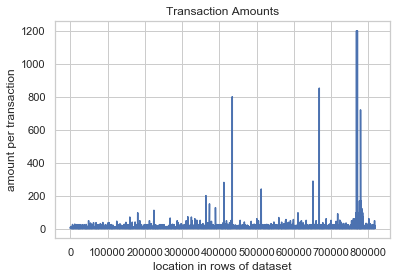

In [245]:
plt.plot(total_set.amount)
plt.title('Transaction Amounts')
plt.ylabel('amount per transaction')
plt.xlabel('location in rows of dataset')

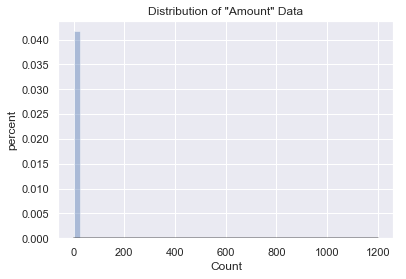

In [246]:
temp_array=np.array(minimized_set.amount)
sns.set()
_ = sns.distplot(temp_array, kde=False, fit=stats.gamma)
_ = plt.title('Distribution of "Amount" Data')
_ = plt.xlabel('Count')
_ = plt.ylabel('percent')

plt.show()


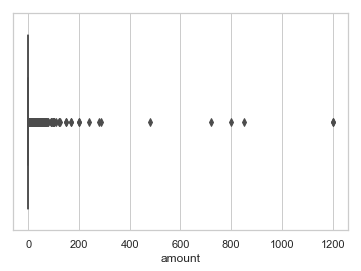

(None, None)

<Figure size 432x288 with 0 Axes>

In [247]:
boxPlot(minimized_set['amount'])

In [248]:
Observed_Column=minimized_set.amount
quartile_1=np.percentile(Observed_Column, 25)
quartile_3=np.percentile(Observed_Column, 75)
inter_quartile_range=quartile_3-quartile_1
Inner_fence=1.5*(inter_quartile_range)
Outer_fence=3*inter_quartile_range
#Fences for viewing outliers
#mild outliers
inner_lower_fence=quartile_1-Inner_fence
inner_upper_fence=quartile_3+Inner_fence
#strong outliers
outer_lower_fence=quartile_1-Outer_fence
outer_upper_fence=quartile_3+Outer_fence

Strong Outliers

In [249]:
comparison=(minimized_set['amount']<outer_lower_fence) | (minimized_set['amount']>outer_upper_fence)
print('Number of Strong Outliers:',len(minimized_set[comparison]))
minimized_set[comparison].head()

Number of Strong Outliers: 177974


transaction_dt customer_id  age_int  product_subclass     product_id  \
43018      2000-11-01    00166324        9            100514  4710626521716   
43020      2000-11-01    00166324        9            110217  4719090900058   
43022      2000-11-01    00166324        9            130315  4714981010038   
787678     2000-11-01    02144702        2            130308  4710670200407   
164975     2000-11-01    00841528        3            100510  4710088424655   

        pin_code_int  asset  amount  sales_price  year  month  week  day  
43018              5    276       2          310  2000     11    44    1  
43020              5    290       2          298  2000     11    44    1  
43022              5    112       4           96  2000     11    44    1  
787678             5     51       3           66  2000     11    44    1  
164975             5     64       2           94  2000     11    44    1

Mild Outliers

In [250]:
print('Median:',minimized_set.amount.median())
print('Inner Fence:',inner_lower_fence,'&',inner_upper_fence)
comparison=(minimized_set['amount']<inner_lower_fence) | (minimized_set['amount']>inner_upper_fence)
print('Number of Mild Outliers:',len(minimized_set[comparison]))
minimized_set[comparison].head()

Median: 1.0
Inner Fence: 1.0 & 1.0
Number of Mild Outliers: 177974


transaction_dt customer_id  age_int  product_subclass     product_id  \
43018      2000-11-01    00166324        9            100514  4710626521716   
43020      2000-11-01    00166324        9            110217  4719090900058   
43022      2000-11-01    00166324        9            130315  4714981010038   
787678     2000-11-01    02144702        2            130308  4710670200407   
164975     2000-11-01    00841528        3            100510  4710088424655   

        pin_code_int  asset  amount  sales_price  year  month  week  day  
43018              5    276       2          310  2000     11    44    1  
43020              5    290       2          298  2000     11    44    1  
43022              5    112       4           96  2000     11    44    1  
787678             5     51       3           66  2000     11    44    1  
164975             5     64       2           94  2000     11    44    1

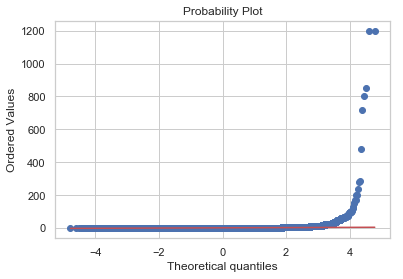

In [251]:
stats.probplot(minimized_set['amount'], dist="norm", plot=pylab)
pylab.show()

In [252]:
from scipy import stats
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
norm=stats.normaltest(minimized_set.amount)
print('test statistic: ',norm[0])
if(norm[1] < 0.055):
    print("P-value: ",norm[1],"\nConclusion: Not a normal distribution.")
else:
    print("P-value: ",norm[1],"\nConclusion: A normal distribution.")

test statistic:  4310127.30717614
P-value:  0.0 
Conclusion: Not a normal distribution.


**Sales Price**


In [253]:
total_set.sales_price.describe()

count    817741.000000
mean        131.875589
std         631.057633
min           1.000000
25%          42.000000
50%          76.000000
75%         132.000000
max      444000.000000
Name: sales_price, dtype: float64

In [254]:
def Large_Price(x):
    '''
    Return Threshold for large prices on items.
        Arbitrary threshold set at 99999 
    '''
    if x>99999:
        x=1
    else:
        x=0
    return x

Text(0.5,0,'location in rows of dataset')

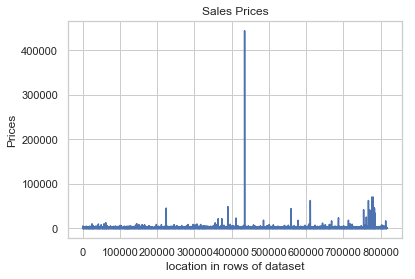

In [255]:
plt.plot(total_set.sales_price)
plt.title('Sales Prices')
plt.ylabel('Prices')
plt.xlabel('location in rows of dataset')

In [256]:
minimized_set[minimized_set.sales_price==444000]

transaction_dt customer_id  age_int  product_subclass     product_id  \
434717     2001-02-17    01622362        1            100516  4711588210441   

        pin_code_int   asset  amount  sales_price  year  month  week  day  
434717             6  432000     800       444000  2001      2     7   17

In [257]:
total_set['Large_Price']=total_set.sales_price.apply(Large_Price)

In [258]:
print('Number of Large Prices',len(total_set[total_set['Large_Price']==1]))
total_set[total_set['Large_Price']==1].head()

Number of Large Prices 1


transaction_dt customer_id  product_subclass     product_id  amount  \
434717     2001-02-17    01622362            100516  4711588210441     800   

         asset  sales_price age_label  age_int  pin_code_int     ...       \
434717  432000       444000       <25        1             6     ...        

        pin_code_A  pin_code_B  pin_code_C  pin_code_D  pin_code_E  \
434717           0           0           0           0           0   

        pin_code_F  pin_code_G  pin_code_H  Large_Order  Large_Price  
434717           1           0           0            1            1  

[1 rows x 31 columns]

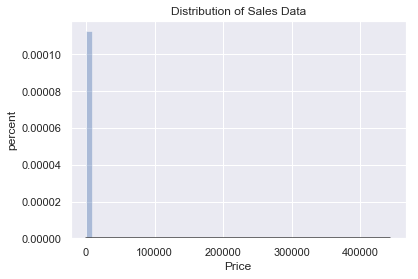

In [259]:
temp_array=np.array(minimized_set.sales_price)
sns.set()
_ = sns.distplot(temp_array, kde=False, fit=stats.gamma)
_ = plt.title('Distribution of Sales Data')
_ = plt.xlabel('Price')
_ = plt.ylabel('percent')

plt.show()



*Here there be outliers!*

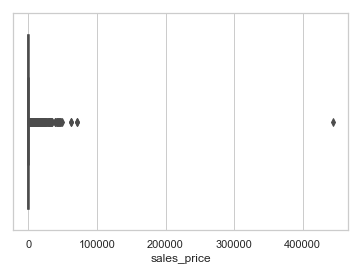

(None, None)

<Figure size 432x288 with 0 Axes>

In [260]:
boxPlot(minimized_set['sales_price'])

In [261]:
Observed_Column=minimized_set.sales_price
quartile_1=np.percentile(Observed_Column, 25)
quartile_3=np.percentile(Observed_Column, 75)
inter_quartile_range=quartile_3-quartile_1
Inner_fence=1.5*(inter_quartile_range)
Outer_fence=3*inter_quartile_range
#Fences for viewing outliers
#mild outliers
inner_lower_fence=quartile_1-Inner_fence
inner_upper_fence=quartile_3+Inner_fence
#strong outliers
outer_lower_fence=quartile_1-Outer_fence
outer_upper_fence=quartile_3+Outer_fence

Strong Outliers

In [262]:
comparison=(minimized_set['sales_price']<outer_lower_fence) | (minimized_set['sales_price']>outer_upper_fence)
print('Number of Strong Outliers:',len(minimized_set[comparison]))
minimized_set[comparison].head()

Number of Strong Outliers: 34788


transaction_dt customer_id  age_int  product_subclass     product_id  \
608898     2000-11-01    01848564       11            320402       20546601   
608897     2000-11-01    01848564       11            320501       20564131   
608896     2000-11-01    01848564       11            320402       20564100   
212091     2000-11-01    01004373        5            110411  4710199011775   
212093     2000-11-01    01004373        5            110401  4710008290056   

        pin_code_int  asset  amount  sales_price  year  month  week  day  
608898             8    905       1         1129  2000     11    44    1  
608897             8    329       1          410  2000     11    44    1  
608896             8    946       1         1180  2000     11    44    1  
212091             5    372      12          434  2000     11    44    1  
212093             5    460      10          540  2000     11    44    1

Mild Outliers

In [263]:
print('Median:',minimized_set.sales_price.median())
print('Inner Fence:',inner_lower_fence,'&',inner_upper_fence)
comparison=(minimized_set['sales_price']<inner_lower_fence) | (minimized_set['sales_price']>inner_upper_fence)
print('Number of Mild Outliers:',len(minimized_set[comparison]))
minimized_set[comparison].head()



Median: 76.0
Inner Fence: -93.0 & 267.0
Number of Mild Outliers: 69184


transaction_dt customer_id  age_int  product_subclass     product_id  \
43018      2000-11-01    00166324        9            100514  4710626521716   
43020      2000-11-01    00166324        9            110217  4719090900058   
43029      2000-11-01    00166324        9            100505  4710594124001   
400793     2000-11-01    01576146        5            110217  4710265849066   
165041     2000-11-01    00841771        5            110507   723125488095   

        pin_code_int  asset  amount  sales_price  year  month  week  day  
43018              5    276       2          310  2000     11    44    1  
43020              5    290       2          298  2000     11    44    1  
43029              5    266       1          300  2000     11    44    1  
400793             5    360       2          270  2000     11    44    1  
165041             5    210       2          270  2000     11    44    1

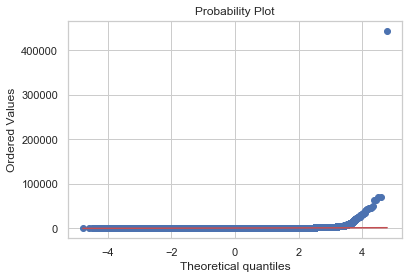

In [264]:
stats.probplot(minimized_set['sales_price'], dist="norm", plot=pylab)
pylab.show()

In [265]:
from scipy import stats
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html
norm=stats.normaltest(minimized_set.sales_price)
print('test statistic: ',norm[0])
if(norm[1] < 0.055):
    print("P-value: ",norm[1],"\nConclusion: Not a normal distribution.")
else:
    print("P-value: ",norm[1],"\nConclusion: A normal distribution.")

test statistic:  4963437.687618293
P-value:  0.0 
Conclusion: Not a normal distribution.


**Explanation:**

For sales prices we can see that they range from 1 to 444000 (yuan?) and furthermore are clearly NOT normally distributed and contain many, many outliers. Its pretty clear that sales price isn't a particularly trustworthy metric on its own, I will have to consider how to handle these outlier data of Sale Price and Amount.

Sales Price x Amount and Data Reduction
-----

*We can see some largely extreme examples from the raw data*

In [266]:
def Large_Purchase_Order(x):
    '''
    Return threshold for large purchases.
        Arbitrary threshold of 40
    '''
    if x>40:
        x=1
    else:
        x=0
    return x

def Large_Price(x):
    '''
    Return threshold for large prices.
        Arbitrary threshold of 10000
    '''
    if x>10000:
        x=1
    else:
        x=0
    return x

Text(0.5,1,'Scatterplot of Amount Purchased by Sales Price')

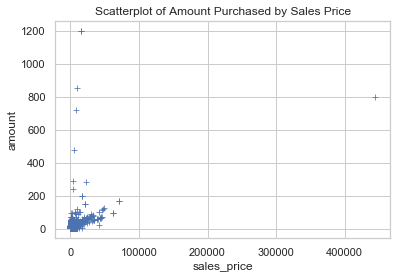

In [267]:
sales_amount=total_set[['amount','sales_price']]
sns.scatterplot(x='sales_price',y='amount',marker='+',data=sales_amount).set_title('Scatterplot of Amount Purchased by Sales Price')

*After removing amounts greater than 99 and costs greater than 99999 there appears to be a definable structure in the data, some kind of linear or non-linear association between price and amount purchased. * 

Text(0.5,1,'Scatterplot of Amount Purchased by Sales Price')

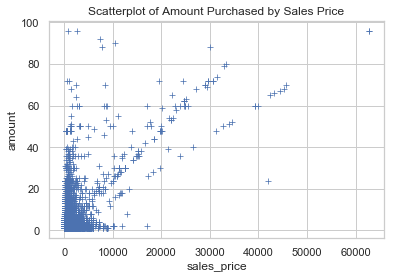

In [268]:
comparison=(total_set.Large_Order<1) & (total_set.Large_Price<1)
#modified
modified=total_set[comparison].copy()
sales_amount=modified[['amount','sales_price']]
sns.scatterplot(x='sales_price',y='amount',marker='+',data=sales_amount).set_title('Scatterplot of Amount Purchased by Sales Price')

*What happens if we divide the 'sales_price' column by the 'amount' column? Therefore the assumption would be that 'sales price' would be the amount spent per transaction rather than unit price. Which would make sense given the extreme prices that have been demonstrated.*

Text(0.5,1,'Scatterplot of Amount Purchased by Sales Price')

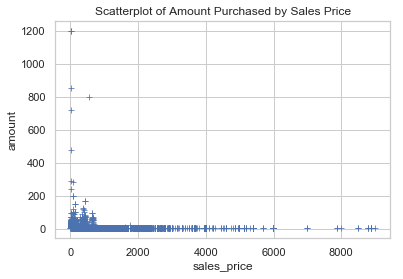

In [269]:
sales_amount=total_set[['amount','sales_price']]
sales_amount['sales_price']=sales_amount['sales_price']/sales_amount['amount']
sns.scatterplot(x='sales_price',y='amount',marker='+',data=sales_amount).set_title('Scatterplot of Amount Purchased by Sales Price')

In [270]:
sales_amount.sales_price.describe()

count    817741.000000
mean        100.595488
std         171.271253
min           1.000000
25%          36.000000
50%          65.000000
75%         109.000000
max        8990.000000
Name: sales_price, dtype: float64

*The 'sales_price' column seems to me to be better looking, there are still extreme examples but less so.... What does the normality look like?*

In [271]:
comparison=(total_set.Large_Order<1) & (total_set.Large_Price<1)

In [272]:
#modified
modified=total_set[comparison].copy()

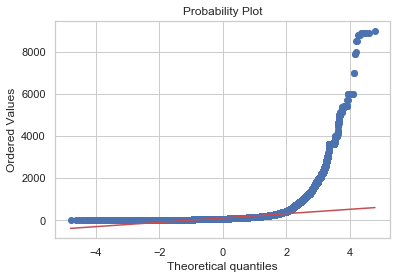

In [273]:
stats.probplot(minimized_set['sales_price']/minimized_set['amount'], dist='norm', plot=pylab)
pylab.show()

*Ok.. But what about the log?*

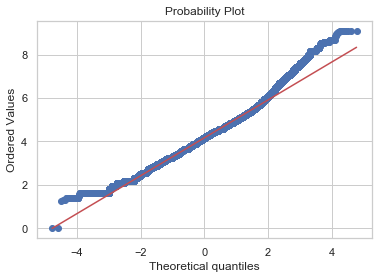

In [274]:
stats.probplot(np.log(minimized_set['sales_price']/minimized_set['amount']), dist="norm", plot=pylab)
pylab.show()

*Transposing the data to log seems to make it look a lot better. Still not normal but much better than before.*

Text(0.5,1,'Scatterplot of Amount Purchased x log(Sales Price/Amount)')

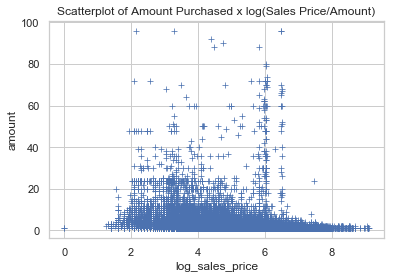

In [275]:
sales_amount=modified[['amount','sales_price']]
sales_amount['log_sales_price']=np.log(sales_amount['sales_price']/sales_amount['amount'])
sns.scatterplot(x='log_sales_price',y='amount',marker='+',data=sales_amount).set_title('Scatterplot of Amount Purchased x log(Sales Price/Amount)')

Text(0.5,1,'Scatterplot of Amount Purchased by Sales Price')

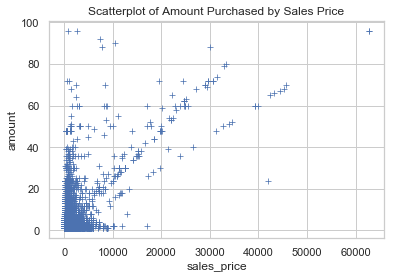

In [276]:
sales_amount=modified[comparison][['amount','sales_price']]
#sales_amount['sales_price']=sales_amount['sales_price']/sales_amount['amount']
sns.scatterplot(x='sales_price',y='amount',marker='+',data=sales_amount).set_title('Scatterplot of Amount Purchased by Sales Price')

In [277]:
print('Percent removed from the original dataset:',((817741-len(sales_amount))/817741)*100)

Percent removed from the original dataset: 0.0028126264917620616


In [278]:
modified['Large_Order']=modified.amount.apply(Large_Purchase_Order)
modified['Large_Price']=modified.sales_price.apply(Large_Price)
comparison=(modified.Large_Order<1) & (modified.Large_Price<1)


In [279]:
minimized_set['Large_Order']=minimized_set.amount.apply(Large_Purchase_Order)
minimized_set['Large_Price']=minimized_set.sales_price.apply(Large_Price)
minimized_set['unit_price']=minimized_set['sales_price']/minimized_set['amount']
minimized_set['Log_Unit_Price']=np.log(minimized_set['unit_price'])
comparison=(minimized_set.Large_Order<1) & (minimized_set.Large_Price<1)

In [280]:
total_set['Large_Order']=total_set.amount.apply(Large_Purchase_Order)
total_set['Large_Price']=total_set.sales_price.apply(Large_Price)
total_set['unit_price']=total_set['sales_price']/total_set['amount']
total_set['Log_Unit_Price']=np.log(total_set['unit_price'])
minimized_set=minimized_set[comparison]

In [281]:
minimized_set.amount.describe()

count    817555.000000
mean          1.362522
std           1.085596
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          40.000000
Name: amount, dtype: float64

In [282]:
minimized_set.sales_price.describe()

count    817555.000000
mean        127.557910
std         226.802515
min           1.000000
25%          42.000000
50%          76.000000
75%         132.000000
max        9980.000000
Name: sales_price, dtype: float64

In [283]:
minimized_set.unit_price.describe()

count    817555.000000
mean        100.521817
std         170.748571
min           1.000000
25%          36.000000
50%          65.000000
75%         109.000000
max        8990.000000
Name: unit_price, dtype: float64

**Explanation:**
After investigating the effect of 'Amount' on 'Sales Price' I decided to remove a large portion of the most extreme of examples, which only comprise of less than 1% of the dataset. Doing so at least puts cost and purchase amount in a still exorbitant but understandable and identifiable range for my purposes; therefore that I limited the data to 40 items purchased in 1 transaction and about $1395.56 U.S. dollars (10000 yuan). Truth be told I can't think of the last time I purchased as many as 40 items and spent anywhere near 1000 dollars at a grocery store, but its not entirely unreasonable for the high-rollers. I think it is likely these data are either not actually from a 'grocery' store, or we might be dealing with data from an online system that automatically adjusts the prices according to the purchase amounts (supply/demand). Regardless of the reasons I would say that these data don't appear to me to follow the natural randomness of shoppers at a normal grocery store as one would expect to see. After doing statistical tests of both 'sales_price' and 'amount' we find that they indeed are *not* normally distributed; which also means that I cannot run a pearson-r correlation test to check for association.
I have also investigated and found that perhaps 'sales_price' is not a per unit price but the total transaction cost. In so doing I created a new variable that represents what I believe to the be the actual unit price, although there is no way for me to know for sure without more information about the dataset.

# Purchasing Behavior Metrics


## Acquisition Cohorts


### Time Cohorts
-----

Here I will attempt to create groups or cohorts of customers who made purchases around the same period of time and try to provide some valuable metrics for predicting purchasing behavior among those cohorts. Typically time cohorts would be seperated by a yearly, monthly, or even daily basis for online customer groups. However, the nature of the data that I am working with doesn't lend itself to these former options very well because it is too short a time to seperate the cohorts into yearly and monthly cohorts, and too long a time to seperate into daily cohorts. So I chose to use a weekly length of time. Doing so added a certain amount of complication since a lot of time operations work well on the former time periods rather than the latter. I also chose to identify cohorts by the week that they enrolled from the start of the study to the end of the study, adding a tad more complication (i.e. week 0 is November 1, 2000 and week 17 is February ).

*Note: I already know at this point that in the modeling section I will be wanting to use weekly units for consistency.*

In [284]:
# Define a function that will parse the date
def get_week(x): return x.isocalendar()
# Create transaction week column
minimized_set['transaction_wk'] = minimized_set['transaction_dt'].apply(get_week) 
# Group by customer id and select the transaction week value
grouping = minimized_set.groupby('customer_id')['transaction_wk'] 
# Assign a minimum transaction day value to the dataset
minimized_set['cohort_wk'] = grouping.transform(min)
minimized_set.head()

transaction_dt customer_id  age_int  product_subclass     product_id  \
753166     2000-11-01    02101750        3            130315  4714981010038   
787527     2000-11-01    02144511        1            110401  4710088410382   
787526     2000-11-01    02144511        1            100312    37000445111   
787525     2000-11-01    02144511        1            100205  4711372660094   
787524     2000-11-01    02144511        1            110401  4710008290032   

        pin_code_int  asset  amount  sales_price  year  month  week  day  \
753166             5     28       1           24  2000     11    44    1   
787527             5     44       1           55  2000     11    44    1   
787526             5     38       1           47  2000     11    44    1   
787525             5     58       1           76  2000     11    44    1   
787524             5     46       1           57  2000     11    44    1   

        Large_Order  Large_Price  unit_price  Log_Unit_Price transaction_wk  \
753166            0            0        24.0        3.178054  (2000, 44, 3)   
787527            0            0        55.0        4.007333  (2000, 44, 3)   
787526            0            0        47.0        3.850148  (2000, 44, 3)   
787525            0            0        76.0        4.330733  (2000, 44, 3)   
787524            0            0        57.0        4.043051  (2000, 44, 3)   

            cohort_wk  
753166  (2000, 44, 3)  
787527  (2000, 44, 3)  
787526  (2000, 44, 3)  
787525  (2000, 44, 3)  
787524  (2000, 44, 3)

In [285]:
def get_date_int(df, column):
    '''
    This handy function parses year,month,week,day.
    '''
    year = df[column].dt.year
    month = df[column].dt.month
    day = df[column].dt.day
    return year, month, day

In [286]:
def get_iso_date_int(df,column):
    '''
    With time coded as iso (year,week,day) this seperates those time periods.
    '''
    temp_df=pd.DataFrame(df[column].tolist(), index=df.index)
    year,week,day=temp_df[0],temp_df[1],temp_df[2]
    return year,week,day

In [287]:
#This dictionary codes the weeks from week of the year (52 weeks) to the week from entry into the dataset to end
wk_dict_int = {44:0, 45:1, 46:2, 47:3, 48:4, \
        49:5, 50:6, 51:7, 52:8, 1:9, 2:10 , 3:11 , 4:12, 5:13 ,6:14 ,7:15,8:16,9:17}

In [288]:
#Code transaction dates into iso format
iso_invoice_year,iso_invoice_week,iso_invoice_day=get_iso_date_int(minimized_set,'transaction_wk')
#apply the dictionary labels to the date
invoice_week = iso_invoice_week.apply(lambda x: wk_dict_int[x])
#Code cohort dates into iso format
iso_cohort_year,iso_cohort_week,iso_cohort_day=get_iso_date_int(minimized_set,'cohort_wk')
#apply the dictionary labels to the date
cohort_week = iso_cohort_week.apply(lambda x: wk_dict_int[x])
#Find the difference between the transaction and the cohort
years_diff=iso_invoice_year-iso_cohort_year
#Difference in weeks. Having coded from start of study to end of study made this a lot simpler.
weeks_diff=invoice_week-cohort_week
#Create a new column that reflect the time in a more identifyable fashion (year,week of year)
minimized_set['cohort_wk_zip']=list(zip(iso_cohort_year,iso_cohort_week))
minimized_set['cohort_index']=weeks_diff
minimized_set.head(3)

transaction_dt customer_id  age_int  product_subclass     product_id  \
753166     2000-11-01    02101750        3            130315  4714981010038   
787527     2000-11-01    02144511        1            110401  4710088410382   
787526     2000-11-01    02144511        1            100312    37000445111   

        pin_code_int  asset  amount  sales_price  year     ...       week  \
753166             5     28       1           24  2000     ...         44   
787527             5     44       1           55  2000     ...         44   
787526             5     38       1           47  2000     ...         44   

        day  Large_Order  Large_Price  unit_price  Log_Unit_Price  \
753166    1            0            0        24.0        3.178054   
787527    1            0            0        55.0        4.007333   
787526    1            0            0        47.0        3.850148   

        transaction_wk      cohort_wk cohort_wk_zip cohort_index  
753166   (2000, 44, 3)  (2000, 44, 3)    (2000, 44)            0  
787527   (2000, 44, 3)  (2000, 44, 3)    (2000, 44)            0  
787526   (2000, 44, 3)  (2000, 44, 3)    (2000, 44)            0  

[3 rows x 21 columns]

**Count weekly active customers from each cohort**

*Column 0 is the size/count of each cohort. The Index of the dataframe is the time in (year/week) units.*

In [289]:
#group the table by index and cohort group index and the (year,week)
grouping=minimized_set.groupby(['cohort_wk_zip','cohort_index'])
#
cohort_data=grouping['customer_id'].apply(pd.Series.nunique)
cohort_data=cohort_data.reset_index()
cohort_counts=cohort_data.pivot(index='cohort_wk_zip',columns='cohort_index',values='customer_id')
cohort_counts

cohort_index       0       1       2       3       4       5       6       7   \
cohort_wk_zip                                                                   
(2000, 44)     4329.0  1610.0  1407.0  1586.0  1510.0  1486.0  1520.0   420.0   
(2000, 45)     4894.0  1004.0  1359.0  1191.0  1111.0  1254.0   312.0  1046.0   
(2000, 46)     2947.0   590.0   606.0   558.0   597.0   123.0   477.0   348.0   
(2000, 47)     3318.0   510.0   474.0   570.0   108.0   480.0   268.0   470.0   
(2000, 48)     2443.0   318.0   395.0    94.0   318.0   245.0   331.0   438.0   
(2000, 49)     2014.0   268.0    56.0   245.0   153.0   276.0   348.0   260.0   
(2000, 50)     2057.0    67.0   216.0   140.0   217.0   291.0   213.0   204.0   
(2000, 51)      342.0    42.0    28.0    26.0    57.0    35.0    30.0    23.0   
(2000, 52)     1241.0    84.0   118.0   176.0   109.0   115.0   119.0   134.0   
(2001, 1)       863.0    86.0   131.0    92.0    84.0    76.0    75.0   110.0   
(2001, 2)      1191.0   146.0   104.0   106.0   125.0   126.0   138.0    54.0   
(2001, 3)      1581.0   148.0   135.0   157.0   158.0   191.0    62.0     NaN   
(2001, 4)      1091.0    84.0    82.0    79.0   118.0    36.0     NaN     NaN   
(2001, 5)       913.0    89.0    69.0   108.0    33.0     NaN     NaN     NaN   
(2001, 6)       930.0    80.0   112.0    36.0     NaN     NaN     NaN     NaN   
(2001, 7)       748.0    82.0    22.0     NaN     NaN     NaN     NaN     NaN   
(2001, 8)      1054.0    52.0     NaN     NaN     NaN     NaN     NaN     NaN   
(2001, 9)       306.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

cohort_index       8       9       10      11      12      13      14      15  \
cohort_wk_zip                                                                   
(2000, 44)     1305.0  1025.0  1364.0  1677.0  1332.0  1342.0  1396.0  1417.0   
(2000, 45)      711.0  1049.0  1406.0   968.0  1096.0  1149.0  1157.0  1472.0   
(2000, 46)      539.0   722.0   508.0   516.0   547.0   524.0   607.0   277.0   
(2000, 47)      650.0   410.0   507.0   507.0   527.0   651.0   229.0     NaN   
(2000, 48)      316.0   341.0   340.0   345.0   421.0   145.0     NaN     NaN   
(2000, 49)      265.0   278.0   238.0   335.0   117.0     NaN     NaN     NaN   
(2000, 50)      220.0   195.0   281.0   105.0     NaN     NaN     NaN     NaN   
(2000, 51)       38.0    54.0    18.0     NaN     NaN     NaN     NaN     NaN   
(2000, 52)      175.0    62.0     NaN     NaN     NaN     NaN     NaN     NaN   
(2001, 1)        49.0     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
(2001, 2)         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
(2001, 3)         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
(2001, 4)         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
(2001, 5)         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
(2001, 6)         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
(2001, 7)         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
(2001, 8)         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
(2001, 9)         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

cohort_index       16     17  
cohort_wk_zip                 
(2000, 44)     1613.0  746.0  
(2000, 45)      564.0    NaN  
(2000, 46)        NaN    NaN  
(2000, 47)        NaN    NaN  
(2000, 48)        NaN    NaN  
(2000, 49)        NaN    NaN  
(2000, 50)        NaN    NaN  
(2000, 51)        NaN    NaN  
(2000, 52)        NaN    NaN  
(2001, 1)         NaN    NaN  
(2001, 2)         NaN    NaN  
(2001, 3)         NaN    NaN  
(2001, 4)         NaN    NaN  
(2001, 5)         NaN    NaN  
(2001, 6)         NaN    NaN  
(2001, 7)         NaN    NaN  
(2001, 8)         NaN    NaN  
(2001, 9)         NaN    NaN

Below is a graph of the counts for each cohort.

In [290]:
gb_cohort_index=cohort_counts.reset_index()
fig = go.Figure([go.Bar(x=list(map(str,list(gb_cohort_index['cohort_wk_zip']))), y=gb_cohort_index[0])])
py.iplot(fig)

**Explanation:** On the table we can see counts of each cohort by the first week of their purchase and the cohort labels vs. the time. Once again we can see the effect of seasonality leading up to the year end. The graph above shows the counts of individuals in each cohort by their week of entry.

**Customer Retention Rate**

*Retention Rate = How many customers returned (weekly units).*

In [291]:
#Store the first column as cohort_sizes 
cohort_sizes=cohort_counts.iloc[:,0]

In [292]:
#Divide all values in the cohort_counts table by cohort_sizes
retention=cohort_counts.divide(cohort_sizes,axis=0)

**Retention Table**


*The first column is expected to have 100% retention rate.*

In [293]:
retention.round(3)*100

cohort_index      0     1     2     3     4     5     6     7     8     9   \
cohort_wk_zip                                                                
(2000, 44)     100.0  37.2  32.5  36.6  34.9  34.3  35.1   9.7  30.1  23.7   
(2000, 45)     100.0  20.5  27.8  24.3  22.7  25.6   6.4  21.4  14.5  21.4   
(2000, 46)     100.0  20.0  20.6  18.9  20.3   4.2  16.2  11.8  18.3  24.5   
(2000, 47)     100.0  15.4  14.3  17.2   3.3  14.5   8.1  14.2  19.6  12.4   
(2000, 48)     100.0  13.0  16.2   3.8  13.0  10.0  13.5  17.9  12.9  14.0   
(2000, 49)     100.0  13.3   2.8  12.2   7.6  13.7  17.3  12.9  13.2  13.8   
(2000, 50)     100.0   3.3  10.5   6.8  10.5  14.1  10.4   9.9  10.7   9.5   
(2000, 51)     100.0  12.3   8.2   7.6  16.7  10.2   8.8   6.7  11.1  15.8   
(2000, 52)     100.0   6.8   9.5  14.2   8.8   9.3   9.6  10.8  14.1   5.0   
(2001, 1)      100.0  10.0  15.2  10.7   9.7   8.8   8.7  12.7   5.7   NaN   
(2001, 2)      100.0  12.3   8.7   8.9  10.5  10.6  11.6   4.5   NaN   NaN   
(2001, 3)      100.0   9.4   8.5   9.9  10.0  12.1   3.9   NaN   NaN   NaN   
(2001, 4)      100.0   7.7   7.5   7.2  10.8   3.3   NaN   NaN   NaN   NaN   
(2001, 5)      100.0   9.7   7.6  11.8   3.6   NaN   NaN   NaN   NaN   NaN   
(2001, 6)      100.0   8.6  12.0   3.9   NaN   NaN   NaN   NaN   NaN   NaN   
(2001, 7)      100.0  11.0   2.9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
(2001, 8)      100.0   4.9   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
(2001, 9)      100.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   

cohort_index     10    11    12    13    14    15    16    17  
cohort_wk_zip                                                  
(2000, 44)     31.5  38.7  30.8  31.0  32.2  32.7  37.3  17.2  
(2000, 45)     28.7  19.8  22.4  23.5  23.6  30.1  11.5   NaN  
(2000, 46)     17.2  17.5  18.6  17.8  20.6   9.4   NaN   NaN  
(2000, 47)     15.3  15.3  15.9  19.6   6.9   NaN   NaN   NaN  
(2000, 48)     13.9  14.1  17.2   5.9   NaN   NaN   NaN   NaN  
(2000, 49)     11.8  16.6   5.8   NaN   NaN   NaN   NaN   NaN  
(2000, 50)     13.7   5.1   NaN   NaN   NaN   NaN   NaN   NaN  
(2000, 51)      5.3   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
(2000, 52)      NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
(2001, 1)       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
(2001, 2)       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
(2001, 3)       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
(2001, 4)       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
(2001, 5)       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
(2001, 6)       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
(2001, 7)       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
(2001, 8)       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN  
(2001, 9)       NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN

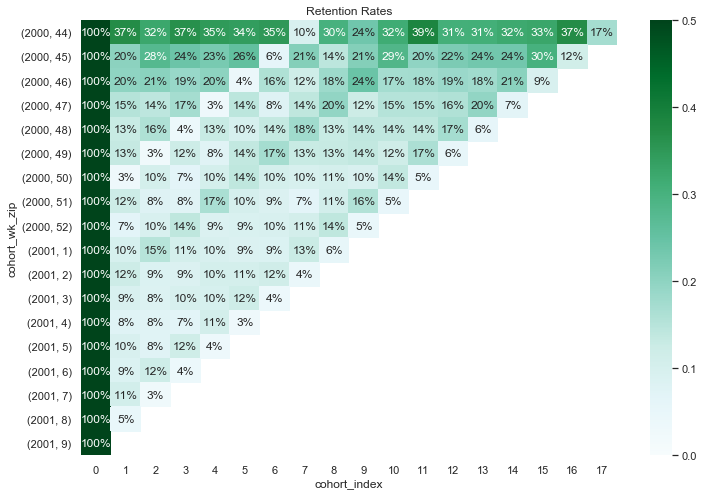

In [294]:
plt.figure(figsize=(12,8))
plt.title('Retention Rates')
sns.heatmap(data=retention.round(3),annot=True,fmt='.0%',vmin=0.0,vmax=0.5,cmap='BuGn')
plt.show()

**Explanation:** Above we can see the percent of customers who returned in the subsequent weeks from the entry into the study to the end. Interestingly, here it is easier to see the effect on seasonality from November,2000 to December,2000; followed by a sharp increase in cohort purchasing at the start of the year.

**Average Purchase Quantity for Each Cohort**


In [295]:
grouping=minimized_set.groupby(['cohort_wk_zip','cohort_index'])
cohort_data=grouping['amount'].mean()#average quantity
cohort_data=cohort_data.reset_index()
average_quantity=cohort_data.pivot(index='cohort_wk_zip',columns='cohort_index',values='amount')
average_quantity.round(1)

cohort_index    0    1    2    3    4    5    6    7    8    9    10   11  \
cohort_wk_zip                                                               
(2000, 44)     1.3  1.4  1.3  1.4  1.4  1.3  1.3  1.4  1.4  1.3  1.3  1.3   
(2000, 45)     1.4  1.4  1.4  1.4  1.4  1.4  1.4  1.4  1.3  1.3  1.4  1.3   
(2000, 46)     1.3  1.4  1.4  1.3  1.3  1.3  1.4  1.3  1.4  1.4  1.3  1.3   
(2000, 47)     1.4  1.4  1.4  1.4  1.4  1.4  1.4  1.3  1.4  1.3  1.4  1.4   
(2000, 48)     1.4  1.4  1.4  1.4  1.4  1.3  1.3  1.3  1.3  1.4  1.4  1.4   
(2000, 49)     1.4  1.4  1.4  1.4  1.3  1.4  1.4  1.3  1.4  1.4  1.4  1.4   
(2000, 50)     1.4  1.6  1.4  1.3  1.3  1.4  1.3  1.4  1.4  1.4  1.4  1.3   
(2000, 51)     1.4  1.4  1.3  1.3  1.3  1.3  1.4  1.4  1.6  1.5  1.5  NaN   
(2000, 52)     1.4  1.3  1.4  1.4  1.3  1.4  1.3  1.4  1.4  1.4  NaN  NaN   
(2001, 1)      1.3  1.4  1.4  1.4  1.4  1.4  1.3  1.4  1.4  NaN  NaN  NaN   
(2001, 2)      1.4  1.4  1.3  1.4  1.4  1.4  1.5  1.4  NaN  NaN  NaN  NaN   
(2001, 3)      1.3  1.3  1.4  1.3  1.3  1.5  1.4  NaN  NaN  NaN  NaN  NaN   
(2001, 4)      1.3  1.4  1.4  1.4  1.5  1.3  NaN  NaN  NaN  NaN  NaN  NaN   
(2001, 5)      1.4  1.4  1.4  1.5  1.4  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
(2001, 6)      1.4  1.4  1.4  1.4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
(2001, 7)      1.3  1.4  1.5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
(2001, 8)      1.4  1.5  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   
(2001, 9)      1.4  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   

cohort_index    12   13   14   15   16   17  
cohort_wk_zip                                
(2000, 44)     1.3  1.4  1.4  1.3  1.4  1.3  
(2000, 45)     1.4  1.4  1.4  1.4  1.4  NaN  
(2000, 46)     1.4  1.4  1.4  1.4  NaN  NaN  
(2000, 47)     1.4  1.4  1.4  NaN  NaN  NaN  
(2000, 48)     1.4  1.4  NaN  NaN  NaN  NaN  
(2000, 49)     1.3  NaN  NaN  NaN  NaN  NaN  
(2000, 50)     NaN  NaN  NaN  NaN  NaN  NaN  
(2000, 51)     NaN  NaN  NaN  NaN  NaN  NaN  
(2000, 52)     NaN  NaN  NaN  NaN  NaN  NaN  
(2001, 1)      NaN  NaN  NaN  NaN  NaN  NaN  
(2001, 2)      NaN  NaN  NaN  NaN  NaN  NaN  
(2001, 3)      NaN  NaN  NaN  NaN  NaN  NaN  
(2001, 4)      NaN  NaN  NaN  NaN  NaN  NaN  
(2001, 5)      NaN  NaN  NaN  NaN  NaN  NaN  
(2001, 6)      NaN  NaN  NaN  NaN  NaN  NaN  
(2001, 7)      NaN  NaN  NaN  NaN  NaN  NaN  
(2001, 8)      NaN  NaN  NaN  NaN  NaN  NaN  
(2001, 9)      NaN  NaN  NaN  NaN  NaN  NaN

**Explanation:** The table above reflects some of what we already know based on the previous exploring of the data. In this case its a bit more easy to see that the cohorts typically spend from 1 to 1.5 on average for each transaction over time.

**Average Transaction Price for Each Cohort**

In [296]:
grouping=minimized_set.groupby(['cohort_wk_zip','cohort_index'])
cohort_data=grouping['sales_price'].mean()#average quantity
cohort_data=cohort_data.reset_index()
average_quantity=cohort_data.pivot(index='cohort_wk_zip',columns='cohort_index',values='sales_price')
average_quantity.round(2)

cohort_index       0       1       2       3       4       5       6       7   \
cohort_wk_zip                                                                   
(2000, 44)     118.55  117.69  119.02  130.00  123.04  123.12  119.48  107.43   
(2000, 45)     122.19  125.67  121.23  121.30  121.74  116.38  104.60  119.77   
(2000, 46)     130.20  155.97  128.27  119.11  120.17  112.18  127.42  122.70   
(2000, 47)     140.74  152.02  128.16  127.02  129.26  131.44  122.25  147.55   
(2000, 48)     132.14  142.98  116.16  114.44  127.10  132.30  142.28  142.95   
(2000, 49)     130.97  131.01  123.38  137.93  127.70  125.32  142.34  128.11   
(2000, 50)     126.10  144.02  116.73  125.80  142.57  141.45  131.08  124.07   
(2000, 51)     134.27   92.43  153.65  171.90  145.33  127.58  109.82  137.60   
(2000, 52)     122.94  137.57  126.39  145.86  133.77  126.94  117.10  116.93   
(2001, 1)      130.46  135.62  136.29  150.55  131.31  119.70  128.53  127.46   
(2001, 2)      139.14  137.59  139.99  144.50  136.04  126.78  131.69  118.28   
(2001, 3)      146.21  146.94  132.65  131.97  121.11  122.13  129.53     NaN   
(2001, 4)      142.27  141.06  143.54  135.52  138.74  109.78     NaN     NaN   
(2001, 5)      141.14  128.84  143.00  141.30  146.16     NaN     NaN     NaN   
(2001, 6)      133.62  130.72  116.42  112.20     NaN     NaN     NaN     NaN   
(2001, 7)      127.30  132.14  107.23     NaN     NaN     NaN     NaN     NaN   
(2001, 8)      133.62  131.69     NaN     NaN     NaN     NaN     NaN     NaN   
(2001, 9)      142.45     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

cohort_index       8       9       10      11      12      13      14      15  \
cohort_wk_zip                                                                   
(2000, 44)     110.30  114.42  130.61  136.02  122.92  126.09  113.40  115.27   
(2000, 45)     112.65  136.92  141.35  130.52  128.94  122.59  116.22  114.44   
(2000, 46)     140.70  147.45  138.18  130.54  125.90  124.09  124.63  134.15   
(2000, 47)     154.65  133.53  144.67  123.48  121.92  128.24  154.24     NaN   
(2000, 48)     126.69  132.23  116.20  127.75  120.19  120.93     NaN     NaN   
(2000, 49)     118.74  123.42  118.74  123.11  114.57     NaN     NaN     NaN   
(2000, 50)     129.11  112.73  126.74  121.21     NaN     NaN     NaN     NaN   
(2000, 51)     117.46  136.14  117.59     NaN     NaN     NaN     NaN     NaN   
(2000, 52)     109.47  129.26     NaN     NaN     NaN     NaN     NaN     NaN   
(2001, 1)      119.70     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
(2001, 2)         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
(2001, 3)         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
(2001, 4)         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
(2001, 5)         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
(2001, 6)         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
(2001, 7)         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
(2001, 8)         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
(2001, 9)         NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

cohort_index       16      17  
cohort_wk_zip                  
(2000, 44)     112.78  116.24  
(2000, 45)     119.22     NaN  
(2000, 46)        NaN     NaN  
(2000, 47)        NaN     NaN  
(2000, 48)        NaN     NaN  
(2000, 49)        NaN     NaN  
(2000, 50)        NaN     NaN  
(2000, 51)        NaN     NaN  
(2000, 52)        NaN     NaN  
(2001, 1)         NaN     NaN  
(2001, 2)         NaN     NaN  
(2001, 3)         NaN     NaN  
(2001, 4)         NaN     NaN  
(2001, 5)         NaN     NaN  
(2001, 6)         NaN     NaN  
(2001, 7)         NaN     NaN  
(2001, 8)         NaN     NaN  
(2001, 9)         NaN     NaN

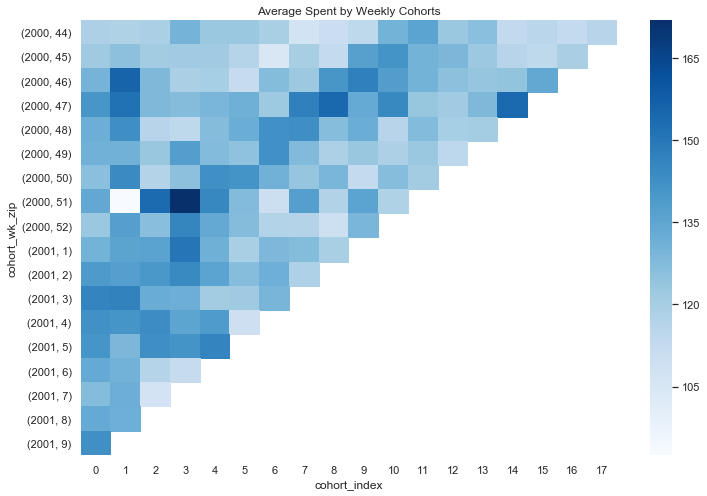

In [297]:
plt.figure(figsize=(12,8))
plt.title('Average Spent by Weekly Cohorts')
sns.heatmap(data=average_quantity.round(2),annot=False,cmap='Blues')
plt.show()

**Explanation:** Above we can see for each cohort group the average price for items is typically from 100 to 150 yuan. The seeming seasonality component we are seeing in the average price for the items seems to confirm a suspicion of mine that the 'sales_price' column is probably the amount of total purchase rather than the cost of the item, but unfortunately I can't know certain.

*Note: I chose to leave off the annotations because the exponents made the graph harder to read.*



**Average Unit Price for Each Cohort**


In [298]:
grouping=minimized_set.groupby(['cohort_wk_zip','cohort_index'])
cohort_data=grouping['unit_price'].mean()#average quantity
cohort_data=cohort_data.reset_index()
average_quantity=cohort_data.pivot(index='cohort_wk_zip',columns='cohort_index',values='unit_price')
average_quantity.round(2)

cohort_index       0       1       2       3       4       5       6       7   \
cohort_wk_zip                                                                   
(2000, 44)      95.23   97.15   98.09  102.92   97.09   98.46   94.35   84.56   
(2000, 45)      98.16   97.35   94.70   94.93   96.37   91.45   84.54   92.69   
(2000, 46)     102.64  117.34  100.06   94.88   92.39   87.79  101.43   99.54   
(2000, 47)     106.19  115.34   96.37   98.24   84.25   97.82   97.53  118.67   
(2000, 48)     100.39  112.46   88.78   86.88   99.81  106.25  110.39  114.63   
(2000, 49)     101.78  102.91   89.26  110.07  103.45   99.03  109.07  100.39   
(2000, 50)      98.27  101.94   90.55   98.14  112.97  109.28  102.37   97.98   
(2000, 51)     103.05   71.58  124.77  140.88  112.80   96.98   87.25  121.25   
(2000, 52)      96.76  115.30   95.80  112.61  104.97  102.18   94.55   91.05   
(2001, 1)      108.31  100.27  106.62  122.52  101.06   90.50   95.48   99.45   
(2001, 2)      108.71  106.06  111.27  111.51  103.66   98.71   99.45   87.00   
(2001, 3)      114.77  118.92  104.93  107.79   98.11   91.38   99.11     NaN   
(2001, 4)      113.80  111.44  111.82  108.62   96.99   83.83     NaN     NaN   
(2001, 5)      112.82  102.10  110.56  106.96  102.98     NaN     NaN     NaN   
(2001, 6)      105.60  105.78   93.14   80.38     NaN     NaN     NaN     NaN   
(2001, 7)      102.39  103.43   68.22     NaN     NaN     NaN     NaN     NaN   
(2001, 8)      102.62   94.54     NaN     NaN     NaN     NaN     NaN     NaN   
(2001, 9)      103.80     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

cohort_index       8       9       10      11      12      13      14     15  \
cohort_wk_zip                                                                  
(2000, 44)      88.00   96.13  106.24  107.75  101.78  100.84   91.75  92.36   
(2000, 45)      94.68  109.70  111.84  105.47  103.71   96.29   91.88  89.37   
(2000, 46)     111.23  115.97  111.02  103.77   96.78   95.36   96.62  99.83   
(2000, 47)     117.99  105.14  107.32   97.84   92.56   94.70  112.25    NaN   
(2000, 48)      96.87  106.06   87.09   99.90   92.64   93.54     NaN    NaN   
(2000, 49)      97.47   97.46   93.46   92.38   87.55     NaN     NaN    NaN   
(2000, 50)      96.03   90.68   98.65   93.63     NaN     NaN     NaN    NaN   
(2000, 51)      85.02   90.65   84.88     NaN     NaN     NaN     NaN    NaN   
(2000, 52)      88.35   99.04     NaN     NaN     NaN     NaN     NaN    NaN   
(2001, 1)       93.40     NaN     NaN     NaN     NaN     NaN     NaN    NaN   
(2001, 2)         NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN   
(2001, 3)         NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN   
(2001, 4)         NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN   
(2001, 5)         NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN   
(2001, 6)         NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN   
(2001, 7)         NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN   
(2001, 8)         NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN   
(2001, 9)         NaN     NaN     NaN     NaN     NaN     NaN     NaN    NaN   

cohort_index      16     17  
cohort_wk_zip                
(2000, 44)     88.30  93.37  
(2000, 45)     91.15    NaN  
(2000, 46)       NaN    NaN  
(2000, 47)       NaN    NaN  
(2000, 48)       NaN    NaN  
(2000, 49)       NaN    NaN  
(2000, 50)       NaN    NaN  
(2000, 51)       NaN    NaN  
(2000, 52)       NaN    NaN  
(2001, 1)        NaN    NaN  
(2001, 2)        NaN    NaN  
(2001, 3)        NaN    NaN  
(2001, 4)        NaN    NaN  
(2001, 5)        NaN    NaN  
(2001, 6)        NaN    NaN  
(2001, 7)        NaN    NaN  
(2001, 8)        NaN    NaN  
(2001, 9)        NaN    NaN

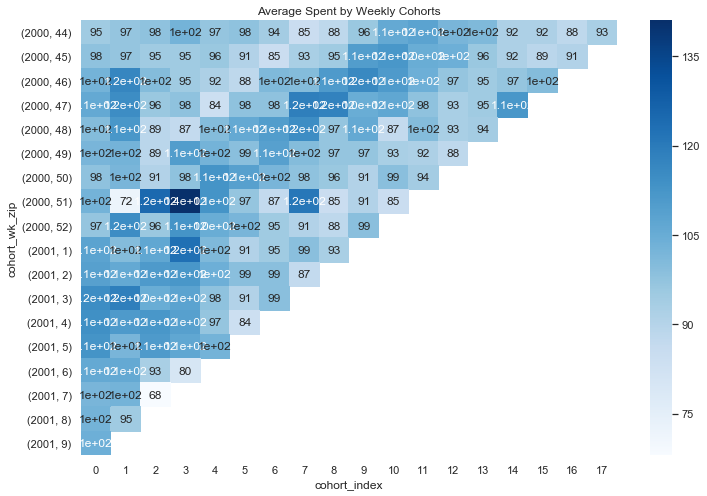

In [299]:
plt.figure(figsize=(12,8))
plt.title('Average Spent by Weekly Cohorts')
sns.heatmap(data=average_quantity.round(0),annot=True,cmap='Blues')
plt.show()

_______________

Recency, Frequency, Monetary (RFM) Segmentation
=====================

**Grouping RFM values**

Behavioral customer segmentation based on three metrics:
    1. Recency (R)
        - How many days since customer's last purchase
        - the lower the better
    2. Frequency (F)
        - How many purchases the customer has done 
    3. Monetary Value (M)
        - Measures how much the customer has spent 

RFM variables are useful for beginning to classify users based on their behavior over time.

In [300]:
#Preprocess data
rmf_minimized_set=minimized_set[['product_id','amount','transaction_dt','sales_price','customer_id','unit_price']]

In [301]:
#Preprocess data
rmf_minimized_set['total_sum']=rmf_minimized_set['unit_price']*minimized_set['amount']

In [302]:
print('min of dataset: {}, max of dataset: {} '.format(min(rmf_minimized_set.transaction_dt),max(rmf_minimized_set.transaction_dt)))

min of dataset: 2000-11-01 00:00:00, max of dataset: 2001-02-28 00:00:00 


In [303]:
#setting day units from last day of dataset
snapshot_date=max(rmf_minimized_set.transaction_dt)+dt.timedelta(days=1)#<add 1 day to date
snapshot_date

Timestamp('2001-03-01 00:00:00')

RFM for values 

In [304]:
#Aggregate data on a customer level 
rmf_dataframe=rmf_minimized_set.groupby(['customer_id']).agg({
    'transaction_dt': lambda x: (snapshot_date-x.max()).days,'product_id':'count','total_sum':'sum'})

#Rename columns for easier interpretation
rmf_dataframe.rename(columns={'transaction_dt':'Recency',
                         'product_id':'Frequency','total_sum':'Monetary'},inplace=True)

rmf_dataframe.sort_values(by='Monetary',ascending=False).head(15)

Recency  Frequency  Monetary
customer_id                              
00020459           1       1246  160961.0
02112589           1        878  126779.0
00842419           2        133  120146.0
02112596           1        822  118900.0
01579727           4        311   99350.0
02113579           1        776   97244.0
02133874           1        460   83060.0
00570565           1        548   82159.0
01847994           4        754   80493.0
01647457           2        426   56703.0
01359015           4        494   55628.0
00380393           4        412   55310.0
01982640           1        345   55140.0
00095907           3        389   54911.0
00708456           3        322   54762.0

**Explanation:** Here we can see the Recency, Frequency, and Monetary values have been created and I have sorted the values descending by the Monetary column. It is very clear and easy to see now which customers can be considored the most 'valuable' to the organization. 

*For example: We can see customer 00020459 has bought an item(s) very recently (1 day) and buys products very often (1,246) and has spent a lot of money (160961.0) compared to the other customers.*

**Building RFM Segment Quartiles Using Chosen Thresholds**

*In this case the customers are being segmented into 4 equal groups by percentiles (quartiles).*

In [305]:
r_labels=range(4,0,-1) #<reversed lower recency is better
#higher labels higher values
f_labels=range(1,5)
m_labels=range(1,5)

r_quartiles=pd.qcut(rmf_dataframe['Recency'],4,labels=r_labels)
f_quartiles=pd.qcut(rmf_dataframe['Frequency'],4,labels=f_labels)
m_quartiles=pd.qcut(rmf_dataframe['Monetary'],4,labels=f_labels)

rmf_dataframe=rmf_dataframe.assign(R=r_quartiles.values)
rmf_dataframe=rmf_dataframe.assign(F=f_quartiles.values)
rmf_dataframe=rmf_dataframe.assign(M=m_quartiles.values)
rmf_dataframe.head()

Recency  Frequency  Monetary  R  F  M
customer_id                                       
00001069          19         11    1944.0  3  2  3
00001113          54         18    2230.0  2  3  3
00001250          19         14    1583.0  3  2  2
00001359          87          3     364.0  1  1  1
00001823          36         14    2607.0  2  2  3

**Building RFM Segment and RFM Score**

*RFM Score= Relative Customer Value*

In [306]:
def join_rfm(x): return str(x['R'])+str(x['F'])+str(x['M'])
rmf_dataframe['RFM_Segment']=rmf_dataframe.apply(join_rfm,axis=1)
rmf_dataframe['RFM_Score']=rmf_dataframe[['R','F','M']].sum(axis=1)#Sum across columns

In [307]:
rmf_dataframe.sort_values(by='Monetary',ascending=False).head(15)

Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score
customer_id                                                              
00020459           1       1246  160961.0  4  4  4         444       12.0
02112589           1        878  126779.0  4  4  4         444       12.0
00842419           2        133  120146.0  4  4  4         444       12.0
02112596           1        822  118900.0  4  4  4         444       12.0
01579727           4        311   99350.0  4  4  4         444       12.0
02113579           1        776   97244.0  4  4  4         444       12.0
02133874           1        460   83060.0  4  4  4         444       12.0
00570565           1        548   82159.0  4  4  4         444       12.0
01847994           4        754   80493.0  4  4  4         444       12.0
01647457           2        426   56703.0  4  4  4         444       12.0
01359015           4        494   55628.0  4  4  4         444       12.0
00380393           4        412   55310.0  4  4  4         444       12.0
01982640           1        345   55140.0  4  4  4         444       12.0
00095907           3        389   54911.0  4  4  4         444       12.0
00708456           3        322   54762.0  4  4  4         444       12.0

### Analyzing RFM table

In [308]:
gb_rmf_dataframe=rmf_dataframe.groupby('RFM_Segment').size().sort_values(ascending=False)

Filtering on RFM segments

*Viewing the top 10*

In [309]:
gb_rmf_dataframe[:10]

RFM_Segment
444    3151
111    2742
344    1935
211    1650
333    1377
122    1328
233    1265
222    1237
433    1193
311    1004
dtype: int64

*Inspecting the RFM Segment that has the highest value (444)*

In [310]:
rmf_dataframe[rmf_dataframe['RFM_Segment']=='444'][:10]

Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score
customer_id                                                              
00006668           5         46    5582.0  4  4  4         444       12.0
00010801           3         87    7469.0  4  4  4         444       12.0
00014762           4         35    5410.0  4  4  4         444       12.0
00018173           3        101   18261.0  4  4  4         444       12.0
00020220           5        206   22605.0  4  4  4         444       12.0
00020459           1       1246  160961.0  4  4  4         444       12.0
00020794           4        156   15257.0  4  4  4         444       12.0
00020800           5         59    9642.0  4  4  4         444       12.0
00021951           8        120   13331.0  4  4  4         444       12.0
00022729           5         33    5251.0  4  4  4         444       12.0

*We can see that the 444 segment has a high frequency and monetary values and customers classified within this group would most likely be excellent targets for promotions!*

### Summary Metrics per RFM Score



In [311]:
rmf_dataframe.groupby('RFM_Score').agg({'Recency':'mean',
    'Frequency':'mean','Monetary':['mean','count']}).round(1)

Recency Frequency Monetary      
             mean      mean     mean count
RFM_Score                                 
3.0          91.2       3.0    291.9  2742
4.0          63.2       4.5    522.1  2873
5.0          56.1       6.9    890.4  3443
6.0          40.0       8.7   1115.7  3801
7.0          40.3      13.6   1781.9  3458
8.0          30.1      18.0   2420.4  3488
9.0          23.8      24.6   3207.8  3232
10.0         19.3      36.6   4854.4  3135
11.0         12.3      56.1   7150.8  2939
12.0          4.2      85.8  10622.7  3151

**Explanation:** Now we can see an easier to read table summarized by the relative RFM score. Its much clearer to see how those with a higher RFM score are more important customers to the business.

*Use RFM score to group customers into Gold,Silver,and Bronze segments for easier interpretation.*

In [312]:
def segment_podium(df):
    if df['RFM_Score']>=9:
        return 'Gold'
    elif (df['RFM_Score']>=5) and (df['RFM_Score']<9):
        return 'Silver'
    else:
        return 'Bronze'

In [313]:
rmf_dataframe['General_Segment']=rmf_dataframe.apply(segment_podium,axis=1)

In [314]:
rmf_dataframe.head(10)

Recency  Frequency  Monetary  R  F  M RFM_Segment  RFM_Score  \
customer_id                                                                 
00001069          19         11    1944.0  3  2  3         323        8.0   
00001113          54         18    2230.0  2  3  3         233        8.0   
00001250          19         14    1583.0  3  2  2         322        7.0   
00001359          87          3     364.0  1  1  1         111        3.0   
00001823          36         14    2607.0  2  2  3         223        7.0   
00002189          57         62   14056.0  2  4  4         244       10.0   
00003667          21         13   11509.0  3  2  4         324        9.0   
00004282          47          9     967.0  2  2  2         222        6.0   
00004381         103         11     701.0  1  2  1         121        4.0   
00004947          81         36    3363.0  1  4  3         143        8.0   

            General_Segment  
customer_id                  
00001069             Silver  
00001113             Silver  
00001250             Silver  
00001359             Bronze  
00001823             Silver  
00002189               Gold  
00003667               Gold  
00004282             Silver  
00004381             Bronze  
00004947             Silver

In [315]:
rmf_dataframe.groupby('General_Segment').agg({'Recency':'mean','Frequency':'mean','Monetary':['mean','count']}).round(1)

Recency Frequency Monetary       
                   mean      mean     mean  count
General_Segment                                  
Bronze             76.9       3.8    409.7   5615
Gold               15.0      50.5   6428.1  12457
Silver             41.6      11.8   1544.1  14190

**Explanation:** Above the data is further simplified by classifying customers into just 3 seperate groups which are much easier to compare. 

## Segmentation Solution Using K-means

*Rather than using percentiles and quantiles to seperate customers into recency, frequency, and monetary values I will use K-means to seperate them into semi-unsupervised groups. This has the added bonus of being easier to execute and letting the data decide the groups of customers. The downside of using this method is we aren't choosing the groups based on a simple metric and can be a bit more difficult to describe if needing to provide the solution to business partners.*

In [316]:
rmf_minimized_set=minimized_set[['product_id','amount','transaction_dt','sales_price','customer_id','unit_price']]
rmf_minimized_set['total_sum']=rmf_minimized_set['unit_price']*minimized_set['amount']
sorted_minimized_set=minimized_set.sort_values(by=['customer_id','transaction_dt'])
sorted_minimized_set.head(5)

transaction_dt customer_id  age_int  product_subclass     product_id  \
0     2000-11-13    00001069       11            100314  4710176008699   
1     2000-11-13    00001069       11            100205  9556439880610   
4     2001-01-21    00001069       11            110333  4712603661644   
2     2001-01-21    00001069       11            110333  4710320224661   
3     2001-01-21    00001069       11            100311  4710022101208   

   pin_code_int  asset  amount  sales_price  year     ...       week  day  \
0             5     78       1           98  2000     ...         46   13   
1             5     80       1           89  2000     ...         46   13   
4             5    313       1          348  2001     ...          3   21   
2             5    361       1          425  2001     ...          3   21   
3             5    197       1          198  2001     ...          3   21   

   Large_Order  Large_Price  unit_price  Log_Unit_Price  transaction_wk  \
0            0            0        98.0        4.584967   (2000, 46, 1)   
1            0            0        89.0        4.488636   (2000, 46, 1)   
4            0            0       348.0        5.852202    (2001, 3, 7)   
2            0            0       425.0        6.052089    (2001, 3, 7)   
3            0            0       198.0        5.288267    (2001, 3, 7)   

       cohort_wk cohort_wk_zip cohort_index  
0  (2000, 46, 1)    (2000, 46)            0  
1  (2000, 46, 1)    (2000, 46)            0  
4  (2000, 46, 1)    (2000, 46)            9  
2  (2000, 46, 1)    (2000, 46)            9  
3  (2000, 46, 1)    (2000, 46)            9  

[5 rows x 21 columns]

In [317]:
snapshot_date=max(rmf_minimized_set.transaction_dt)+dt.timedelta(days=1)
snapshot_date

Timestamp('2001-03-01 00:00:00')

**Adding Tenure**

*Tenure=Length of time customer is active*

In [318]:
dataframe_rfmt=rmf_minimized_set
dataframe_rfmt['transaction_dt_temp']=dataframe_rfmt['transaction_dt']

#Aggregate data on a customer level 
dataframe_rfmt=rmf_minimized_set.groupby(['customer_id']).agg({
    'transaction_dt':lambda x: (snapshot_date-x.max()).days,
    'product_id':'count','total_sum':'sum',
    'transaction_dt_temp':lambda x: (x.max()-x.min()).days})

In [319]:
#Rename columns for easier interpretation
dataframe_rfmt.rename(columns={'transaction_dt':'Recency',
                         'product_id':'Frequency','total_sum':'Monetary',
                        'transaction_dt_temp':'Tenure'},inplace=True)

dataframe_rfmt['Tenure']=dataframe_rfmt['Tenure']+1

Pre-process data

In [320]:
# Apply log transformation
dataframe_rfmt_log = np.log(dataframe_rfmt)

In [321]:
dataframe_rfmt_log.head()

Recency  Frequency  Monetary    Tenure
customer_id                                         
00001069     2.944439   2.397895  7.572503  4.499810
00001113     3.988984   2.890372  7.709757  4.025352
00001250     2.944439   2.639057  7.367077  1.945910
00001359     4.465908   1.098612  5.897154  0.000000
00001823     3.583519   2.639057  7.865955  4.430817

In [322]:
# Initialize StandardScaler and fit it 
scaler = StandardScaler(); scaler.fit(dataframe_rfmt_log)

# Transform and store the scaled data as datamart_rfmt_normalized
dataframe_rfmt_normalized = scaler.transform(dataframe_rfmt_log)

Calculate and plot sum of squared errors

In [323]:
# Create random data with numpy
X_matrix=np.matrix(dataframe_rfmt_normalized)
K=list(range(1,11))
y=[]
for i in K:
    kmeans=KMeans(n_clusters=i, random_state=1, init='k-means++')
    kmeans.fit(X_matrix)
    labels=kmeans.labels_
    y.append(kmeans.inertia_)
    
# Create a trace
trace = go.Scatter(x = K, y = y)

data = [trace]
layout = go.Layout(xaxis=dict(title='K',
        titlefont=dict(family='Arial, sans-serif',size=18,color='lightgrey'),
        showticklabels=True,tickangle=45,tickfont=dict(family='Old Standard TT, serif',
            size=14,color='black'),exponentformat='e', showexponent='all'
    ),yaxis=dict(title='Sums of Squares',
        titlefont=dict(family='Arial, sans-serif',size=18,
            color='lightgrey'),showticklabels=True,tickangle=45,
        tickfont=dict(family='Old Standard TT, serif',size=14,
            color='black'),exponentformat='e',showexponent='all'))
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

*Here I am choosing to seperate the customers into 3 distinct groups, this can also make it more interesting to compare the quantile metrics vs the clusters.*

In [324]:
# Initialize KMeans
kmeans = KMeans(n_clusters=3, random_state=1) 
# Fit k-means clustering on the normalized data set
kmeans.fit(dataframe_rfmt_normalized)
# Extract cluster labels
cluster_labels = kmeans.labels_

Now we can see there are three clustered groups, below is a summary table of those clusters.

In [325]:
# Create a new DataFrame by adding a cluster label column to datamart_rfmt
dataframe_rfmt_k3 = dataframe_rfmt.assign(Cluster=cluster_labels)

# Group by cluster
grouped = dataframe_rfmt_k3.groupby(['Cluster'])

# Calculate average RFMT values and segment sizes for each cluster
grouped.agg({'Recency': 'mean','Frequency': 'mean','Monetary': 'mean','Tenure': ['mean', 'count']}).round(1).style.hide_index()

In [326]:
X_matrix=np.matrix(dataframe_rfmt_log)
cluster=KMeans(n_clusters=3, random_state=1)
dataframe_rfmt_log['cluster']=cluster.fit_predict(X_matrix)

series_dict = dict(dataframe_rfmt_log.cluster.value_counts())
xlabels = list(map(str, (list(series_dict.keys()))))
xlabels = ['cluster_number_'+str(x) for x in xlabels]

data = [go.Bar(x=xlabels,y=list(series_dict.values()),text=(list(series_dict.values())),
               textposition='outside',marker=dict(
               color=['rgb(217,217,217)','rgb(217,217,217)','rgb(217,217,217)','rgb(217,217,217)'],line=dict(color='rgb(68,68,68)',
               width=1.5),),opacity=0.6)]

layout = go.Layout(
                title='Number of points in each cluster for k-means under the best K.',
                yaxis=dict(title='Size</b>',ticks='',showticklabels=False,showgrid=False,
                titlefont=dict(family='Arial, sans-serif',size=18,color='rgb(107, 107, 107)',))
                ,xaxis=dict(ticks='',tickangle=0))

#py.iplot(data, filename='basic-bar')

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='text-hover-bar')



In [327]:
from plotly.graph_objs import *

def plot_pca(pivot_transactions, x_cols, clf):
    clf.fit(x_cols)
    labels=clf.labels_
    pca = sklearn.decomposition.PCA(n_components=2)
    pca.fit(pivot_transactions)
    new_matrix= pd.DataFrame(pca.transform(pivot_transactions))
    new_matrix.index = pivot_transactions.index
    new_matrix.columns=['x','y']
    new_matrix['labels']=labels

    labels=sorted(new_matrix.labels.unique())
    data=[]
    for i in labels:
        new_matrix_cluster=new_matrix[new_matrix.labels==i]
        data.append(go.Scattergl(x = new_matrix_cluster.x,y = new_matrix_cluster.y,
                                 mode='markers',
                                 text=[f'Customer ID: {[i][0]}' for i in new_matrix_cluster.index],
                                 marker=dict(opacity=0.75),
                                 name='Cluster_'+str(i)))

    layout = go.Layout(title='PCA vs. Clusters',
        xaxis=dict(title='PCA1'),yaxis=dict(title='PCA2'),hovermode='closest')

    figure=go.Figure(data=data,layout=layout)
    #data = [trace1]
    py.iplot(figure)

*Note: below we are seeing a multi-dimensional space being squashed into 2 dimensions.*

In [328]:
kmeans_cluster=KMeans(n_clusters=3, random_state=1)
X_matrix=np.matrix(dataframe_rfmt_normalized)
plot_pca(dataframe_rfmt_k3, X_matrix, kmeans_cluster)

In [329]:
cluster_map=dataframe_rfmt_k3.reset_index()
cluster_map=cluster_map[['customer_id','Cluster']]
cluster_map=dict(zip(list(cluster_map.customer_id),list(cluster_map.Cluster)))

#Save Dictionary Mappings
with open('cluster_map.pickle', 'wb') as dictionary_map1:
    pickle.dump(cluster_map, dictionary_map1, protocol=pickle.HIGHEST_PROTOCOL)

with open('age_dict_class.pickle', 'wb') as dictionary_map2:
    pickle.dump(age_dict_class, dictionary_map2, protocol=pickle.HIGHEST_PROTOCOL)

with open('inv_age_dict_class.pickle', 'wb') as dictionary_map3:
    pickle.dump(inv_age_dict_class, dictionary_map3, protocol=pickle.HIGHEST_PROTOCOL)

with open('age_dict_int.pickle', 'wb') as dictionary_map4:
    pickle.dump(age_dict_int, dictionary_map4, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('inv_age_dict_int.pickle', 'wb') as dictionary_map5:
    pickle.dump(inv_age_dict_int, dictionary_map5, protocol=pickle.HIGHEST_PROTOCOL)
    
with open('pin_code_dict_int.pickle', 'wb') as dictionary_map6:
    pickle.dump(pin_code_dict_int, dictionary_map6, protocol=pickle.HIGHEST_PROTOCOL)

with open('wk_dict_int.pickle', 'wb') as dictionary_map7:
    pickle.dump(wk_dict_int, dictionary_map7, protocol=pickle.HIGHEST_PROTOCOL)

#Save DataFrames    
minimized_set.to_pickle("./minimized_set.pkl")
total_set.to_pickle("./total_set.pkl")

_______________

## Are the cluster means meaningfully different from one another?

*We assume that the cluster means under K-means should be distinct but why not make a test out of it?*

In [330]:
dataframe_rfmt_k3.head()

Recency  Frequency  Monetary  Tenure  Cluster
customer_id                                               
00001069          19         11    1944.0      90        1
00001113          54         18    2230.0      56        1
00001250          19         14    1583.0       7        1
00001359          87          3     364.0       1        0
00001823          36         14    2607.0      84        1

In [331]:
dataframe_rfmt_k3=dataframe_rfmt_k3.reset_index()

### Recency

In [332]:
print('If we fail to reject the null hypothesis then the data would seem consistent with the claim that there is no difference between the sample means. ')
Math(r'H_{0} : \mu_{Recency_c1} = \mu_{Recency_c2} = \mu_{Recency_c3} = 0 \\ H_{1} : \mu_{Recency_c1} \neq \mu_{Recency_c2} \neq \mu_{Recency_c3} \neq 0')

If we fail to reject the null hypothesis then the data would seem consistent with the claim that there is no difference between the sample means. 


<IPython.core.display.Math object>

In [333]:
bin1=dataframe_rfmt_k3.Cluster==0
bin2=dataframe_rfmt_k3.Cluster==1
bin3=dataframe_rfmt_k3.Cluster==2

one=dataframe_rfmt_k3[bin1].Recency
one_sample_100=one.sample(100, replace=False)
one_std=one_sample_100.std()    

two=dataframe_rfmt_k3[bin2].Recency
two_sample_100=two.sample(100, replace=False)
two_std=two_sample_100.std()

three=dataframe_rfmt_k3[bin3].Recency
three_sample_100=three.sample(100, replace=False)
three_std=three_sample_100.std()

lower,upper = sms.CompareMeans(sms.DescrStatsW(three_sample_100), sms.DescrStatsW(one_sample_100)).tconfint_diff(alpha = 0.01, usevar='unequal')
fstat, pval = stats.f_oneway(one_sample_100, two_sample_100, three_sample_100)
print('F-statistic:',fstat,'95% C.I.:',(lower,upper),'\np-value:',pval)

F-statistic: 119.83401524605586 95% C.I.: (-63.24602672065775, -44.13397327934224) 
p-value: 6.966787504815465e-39


**Conclusion:** Based on an F-test with a threshold of p=0.05 we reject the null hypothesis and find that the data aren't consistent with the claim that the Recency means are equal.

### Frequency

In [334]:
print('If we fail to reject the null hypothesis then the data would seem consistent with the claim that there is no difference between the sample means. ')
Math(r'H_{0} : \mu_{Frequency_c1} = \mu_{Frequency_c2} = \mu_{Frequency_c3} = 0 \\ H_{1} : \mu_{Frequency_c1} \neq \mu_{Frequency_c2} \neq \mu_{Frequency_c3} \neq 0')

If we fail to reject the null hypothesis then the data would seem consistent with the claim that there is no difference between the sample means. 


<IPython.core.display.Math object>

In [335]:
bin1=dataframe_rfmt_k3.Cluster==0
bin2=dataframe_rfmt_k3.Cluster==1
bin3=dataframe_rfmt_k3.Cluster==2

one=dataframe_rfmt_k3[bin1].Frequency
one_sample_100=one.sample(100, replace=False)
one_std=one_sample_100.std()    

two=dataframe_rfmt_k3[bin2].Frequency
two_sample_100=two.sample(100, replace=False)
two_std=two_sample_100.std()

three=dataframe_rfmt_k3[bin3].Frequency
three_sample_100=three.sample(100, replace=False)
three_std=three_sample_100.std()

lower,upper = sms.CompareMeans(sms.DescrStatsW(three_sample_100), sms.DescrStatsW(one_sample_100)).tconfint_diff(alpha = 0.01, usevar='unequal')
fstat, pval = stats.f_oneway(one_sample_100, two_sample_100, three_sample_100)
print('F-statistic:',fstat,'95% C.I.:',(lower,upper),'\np-value:',pval)

F-statistic: 29.18550807317149 95% C.I.: (30.120845687276883, 77.59915431272312) 
p-value: 2.6795083427378955e-12


**Conclusion:** **Conclusion:** Based on an F-test with a threshold of p=0.05 we reject the null hypothesis and find that the data aren't consistent with the claim that the Frequency means are equal.


### Monetary

In [336]:
print('If we fail to reject the null hypothesis then the data would seem consistent with the claim that there is no difference between the sample means. ')
Math(r'H_{0} : \mu_{Monetary_c1} = \mu_{Monetary_c2} = \mu_{Monetary_c3} = 0 \\ H_{1} : \mu_{Monetary_c1} \neq \mu_{Monetary_c2} \neq \mu_{Monetary_c3} \neq 0')

If we fail to reject the null hypothesis then the data would seem consistent with the claim that there is no difference between the sample means. 


<IPython.core.display.Math object>

In [337]:
bin1=dataframe_rfmt_k3.Cluster==0
bin2=dataframe_rfmt_k3.Cluster==1
bin3=dataframe_rfmt_k3.Cluster==2

one=dataframe_rfmt_k3[bin1].Monetary
one_sample_100=one.sample(100, replace=False)
one_std=one_sample_100.std()    

two=dataframe_rfmt_k3[bin2].Monetary
two_sample_100=two.sample(100, replace=False)
two_std=two_sample_100.std()

three=dataframe_rfmt_k3[bin3].Monetary
three_sample_100=three.sample(100, replace=False)
three_std=three_sample_100.std()

lower,upper = sms.CompareMeans(sms.DescrStatsW(three_sample_100), sms.DescrStatsW(one_sample_100)).tconfint_diff(alpha = 0.01, usevar='unequal')
fstat, pval = stats.f_oneway(one_sample_100, two_sample_100, three_sample_100)
print('F-statistic:',fstat,'95% C.I.:',(lower,upper),'\np-value:',pval)

F-statistic: 109.74021249378893 95% C.I.: (5390.917094702181, 8495.922905297819) 
p-value: 2.0693483862444322e-36


**Conclusion:** Based on an F-test with a threshold of p=0.05 we reject the null hypothesis and find that the data aren't consistent with the claim that the Monetary means are equal.